<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-RobertoRomeroVielma-A00822314/blob/main/Semana_8_Data_Analysis_with_Python_(IBM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Materia: Ciencia y Analítica de Datos.
* Nombre de la entrega: Semana 8: Data Analysis with Python (IBM)
* Fecha: 06/11/2022.
* Roberto Romero Vielma - A00822314
* Profesora titular: María de la Paz Rico Fernández
* Profesor tutor: Roberto Antonio Guevara González.

# Evaluación del modelo

* Evaluación en la muestra nos dice que tan bien nuestro modelo, se ajusta a los datos usados para entrenar.
* No nos dice que tan bien nuestro modelo puede ser usado para predecir nuevos datos
* Para solucionarlo debemos dividir los datos en datos para entrenamiento y datos para prueba.

Separar los datos en conjuntos de entrenamiento y prueba es una parte importante en la evaluación del modelo.

Usamos los datos de entrenamiento para tener una idea, de que tan bien se va a desempeñar nuestro modelo en el mundo real.

Cuando separamos los datos, usualmente la parte más grande es usada para el entrenamiento y la parte pequeña para las pruebas.

Por ejemplo:



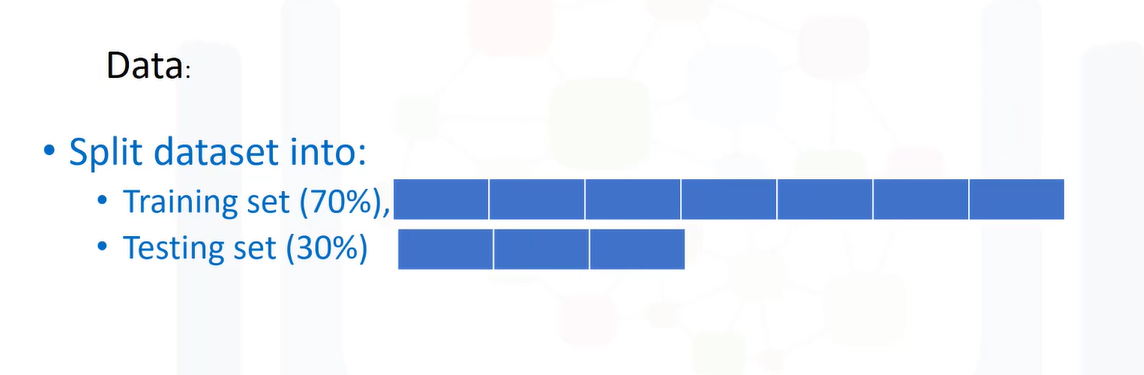

Usamos el conjunto de entrenamiento para construir un modelo y descubrir relaciones predictivas.

Después usamos el conjunto de prueba para evaluar el desempeño del modelo.

Cuando hemos completado las pruebas del modelo, lo que debemos hacer es utilizar todos los datos, para entrenar el modelo y obtener el mejor desempeño.

## Función train_test_split()

* Una función popular para dividir conjuntos de datos, es **train_test_split** de **Scikit-learn**. Esta función divide el dataset en subconjuntos de entrenamiento y prueba.

Lo usamos de la siguiente manera:



```
from sklearn.model_selection import train_test_split #módulo de sklearn a utilizar

x_train, x_test, y_train, y_test=train_test_split(x_data,y_data,test_size=0.3,random_state=0)
```



Donde:

La entradas serán:
* x_data son las variables predictoras
* y_data es la variable objetivo
* test_size es el tamaño de la muestra 305 en este ejemplo
* random_state es la semilla para replicar resultados

Y las salidas:
* x_train y y_train los subconjuntos para entrenamiento 
* x_test y y_test los subconjuntos para prueba



## Generalización del desempeño

* La generalización del error es para medir que tan bien nuestros datos, son para predecir datos nunca antes vistos.
* El error puede obtenerse usando los datos de prueba como una aproximiación del error.

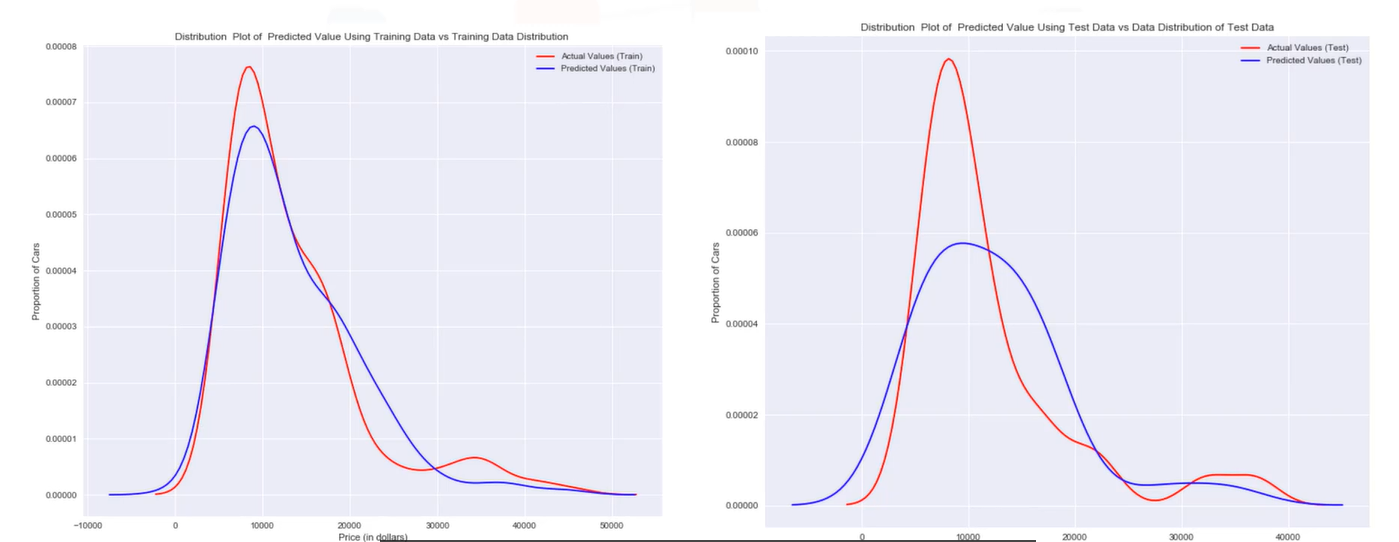

La gráfica de la izquierda se hizo utilizando datos de entrenamiento y la de la derecha usando datos de prueba, tal como se puede observar, los datos de prueba muestran una generalización del error y representan lo que vemos en la vida real.

Usar muchos datos para el entrenamiento, nos da un medio preciso para determinar, que tan bien nuestro modelo se desempeñará en el mundo real.

Si usamos un menor número de datapoints para entrenar el modelo y un número mayor para evaluar el modelo, el error de generalización será menos pero tendremos una buena precisión.

Para evitar los problemas de generalización del desempeño, usamos validación cruzada

## Validación cruzada

* Más usual para métricas fuera de la muestra
* Más efectivo para el uso de datos (cada evaluación es entrenamiento y prueba)



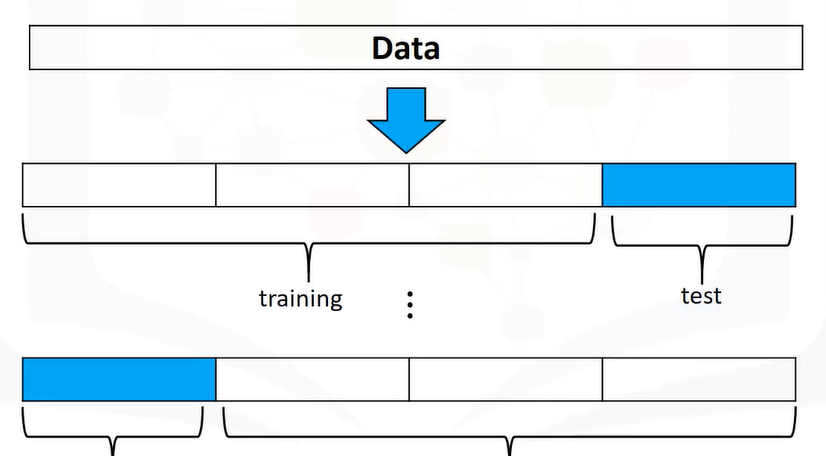

En este método el conjunto de datos es dividido en grupos k-iguales; cada uno llamado como fold.

Por ejemplo 4 folds.

Por ejemplo, podemos tener que en la primera partición tres folds serán para entrenar y usamos uno para pruebas.Posteriormentre otro fold de pruebas es usado en la segunda partición siendo diferente al usado la primera vez, el resto serán para entrenamiento, y lo mismo sucederá con las demás particiones, al final usamos los resultados promedio, como la estimación del error fuera de la muestra.

Para usar la validación cruzada en Python usamos:



```
from skelarn.model_selection import cross_val_score #módulo a utilizar

scores=cross_val_score(lr,x_data, y=data, cv=3)
```

Donde:
* cross_val_score es la función para obtener la validación cruzada de una sola métrica (en este caso ${R_2}$)
* lr es el estimador a utilizar
* x_data las variables predictoras
* y_data la variable objetivo
* cv es el número de particiones de la validación cruzada

La función regresa un arreglo con todos los scores, uno por cada partición realizada, para obtener la media podemos usar el método **mean** dentro de **numpy**



```
np.mean(scores)
```





## Función cross_val_predict()

* Regresa la predicción que es obtenida para cada elemento cuando este estaba en el conjunto de prueba.
* Tiene una interfaz similar a cross_val_score()

Sigue la siguiente estructura:



```
from sklearn.model_selection import cross_val_predict

yhat=cross_val_predict(lr2e,x_data,y_data,cv=3)
```




# Over-fititng, Under-fitting y Selección del modelo

Consideremos lo siguiente:

Tenemos una función:

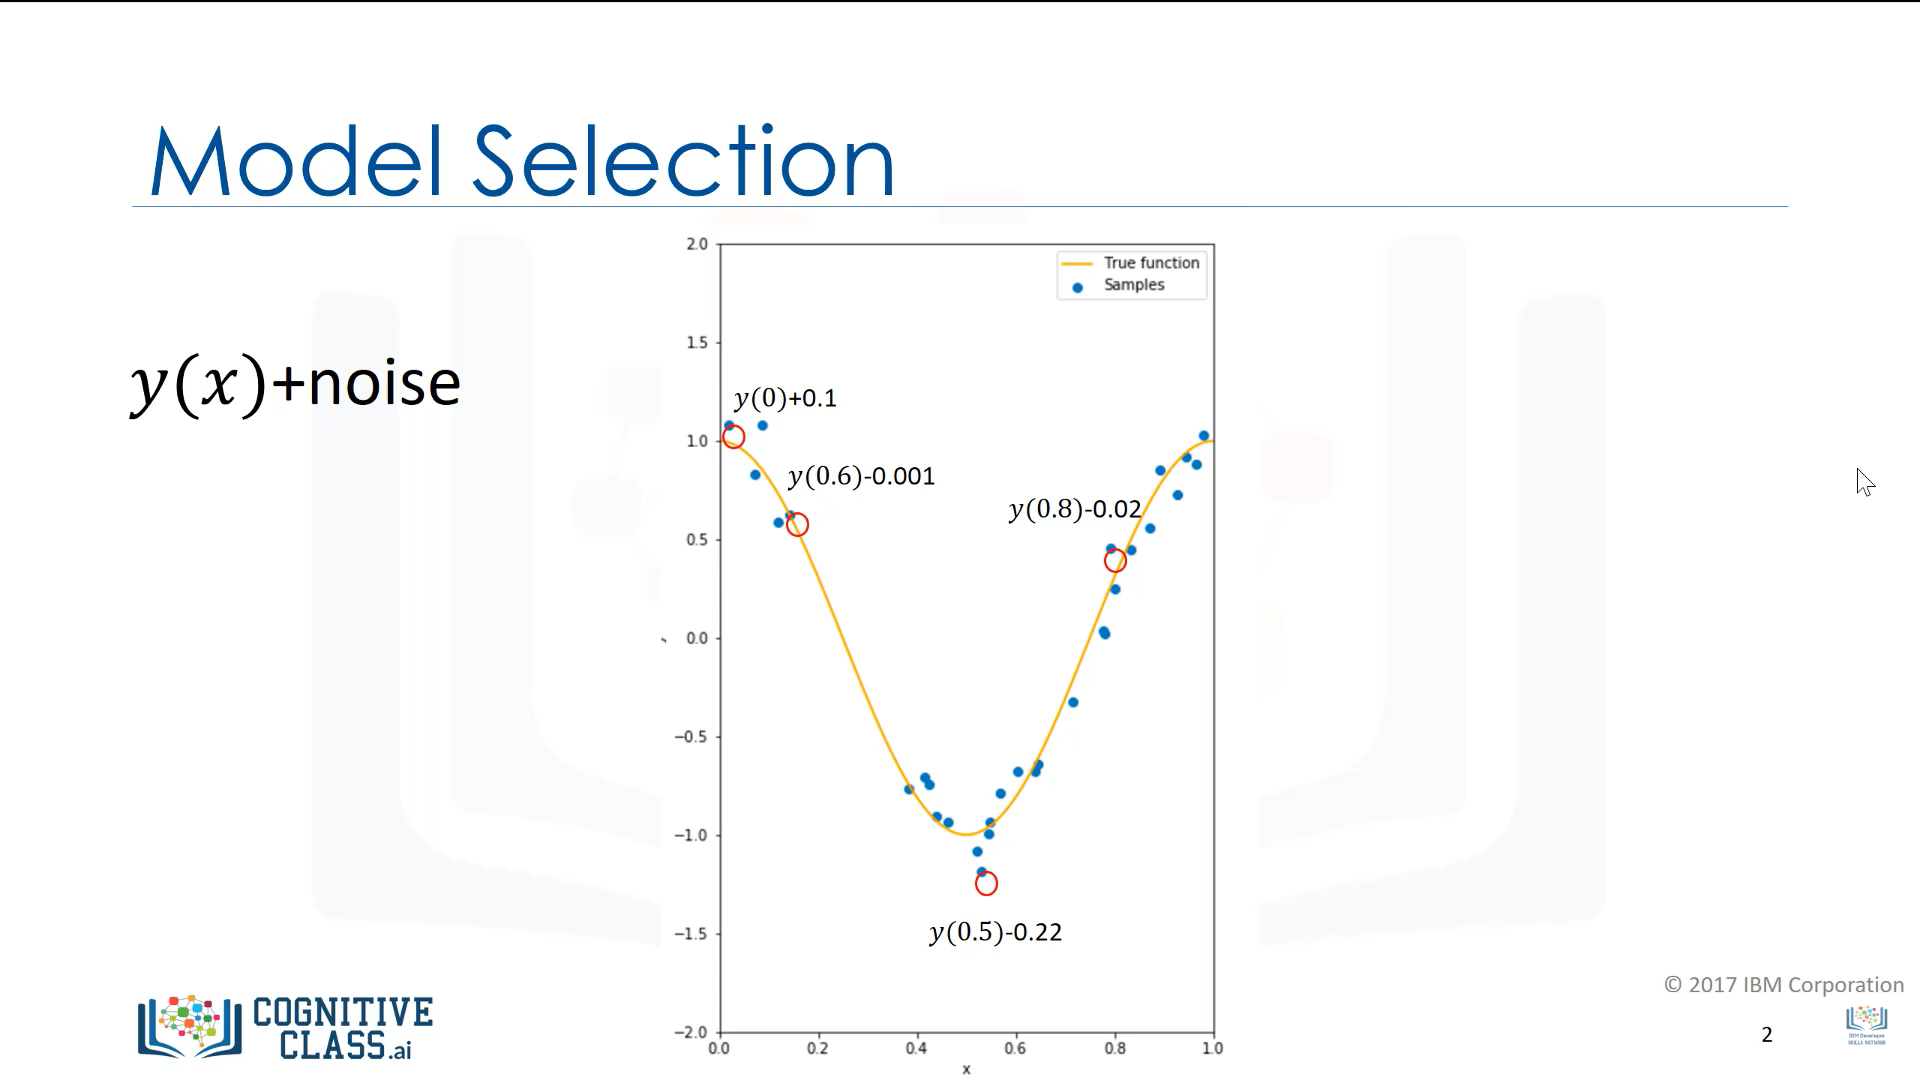

Asumimos que los puntos de entrenamiento vienen de una función polinomial, más ruido. El objetivo de la selección del modelo es determinar el orden de la la función polinomial que provee el mejor estimado de la función **y(x)** , si usamos una función lineal simple p.e.

${y=b_0+b_1x}$

tendremos como resultado un modelo que no será lo suficientemente complejo para predecir datos (under-fitting).





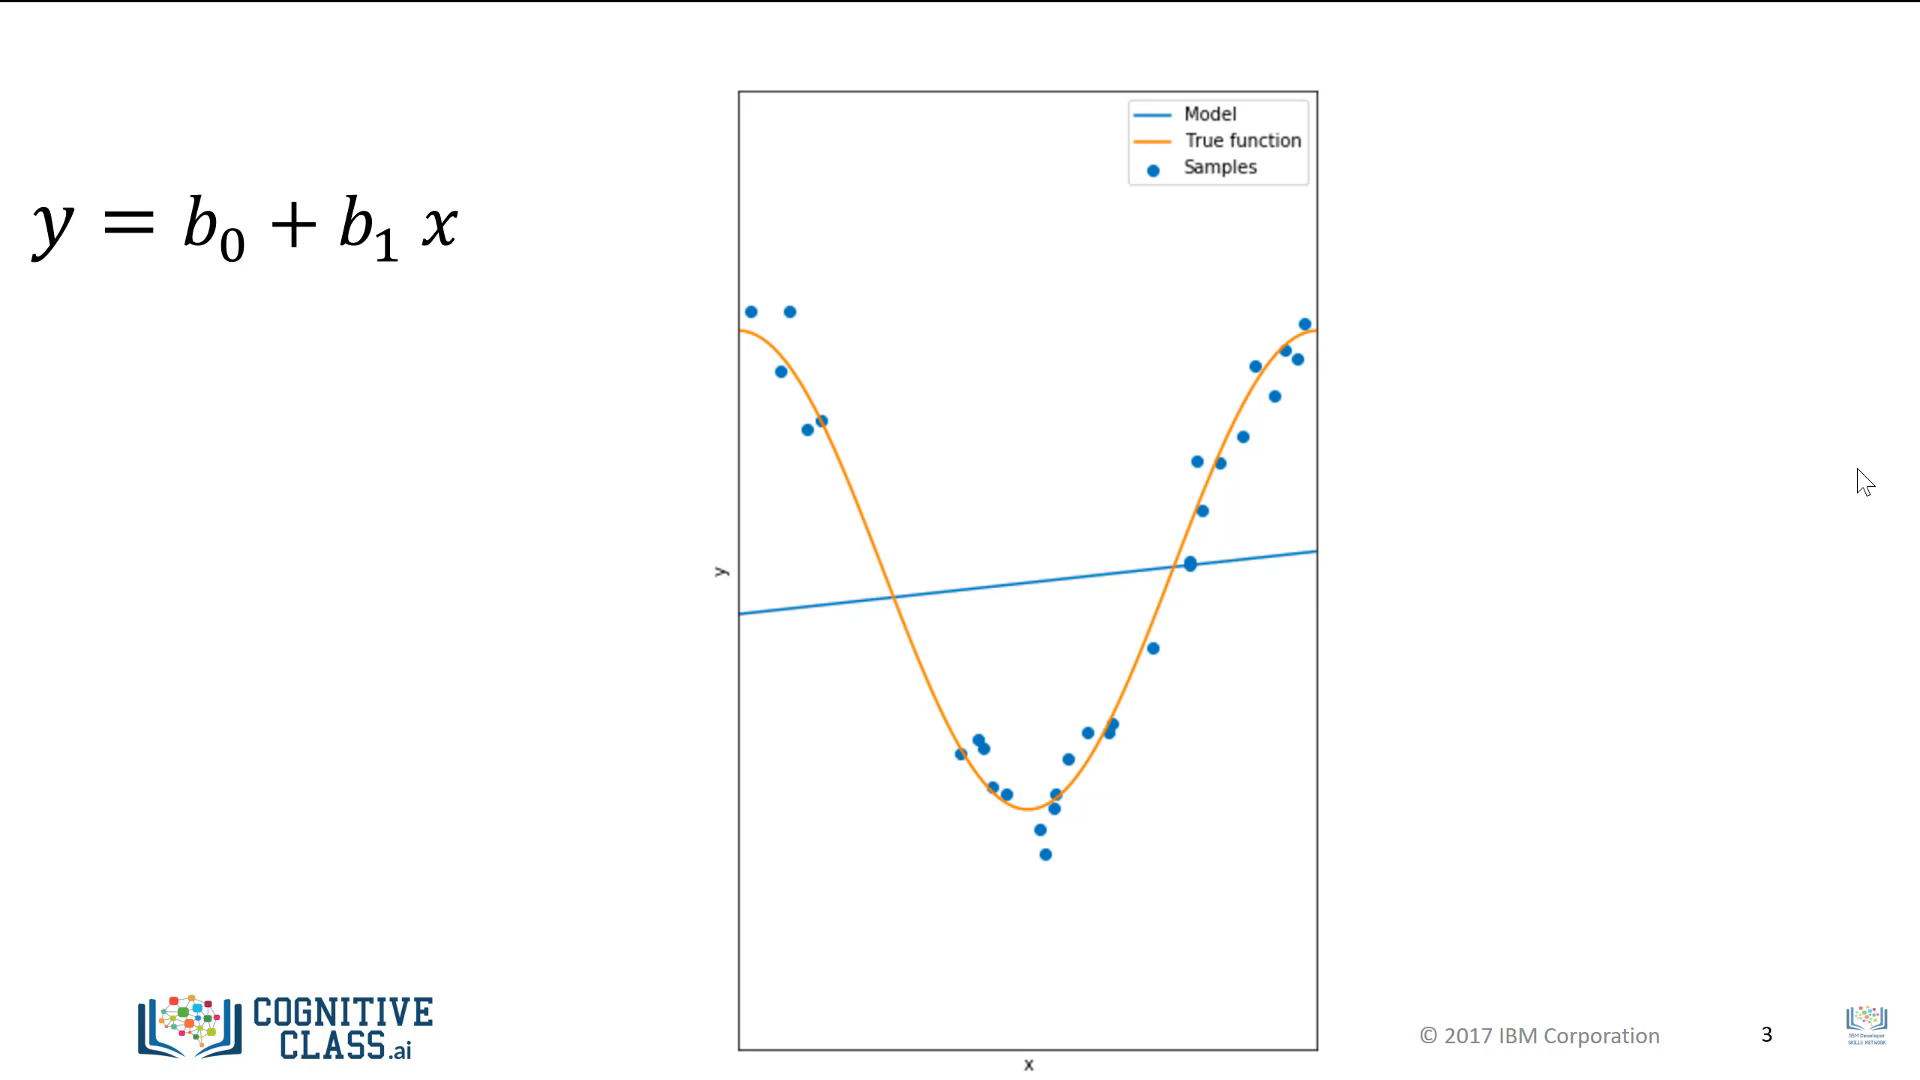

Si incrementamos el orden del polinomial, el modelo se ajusta mejor, pero todavía no es lo suficientemente flexible y exhibe under-fitting

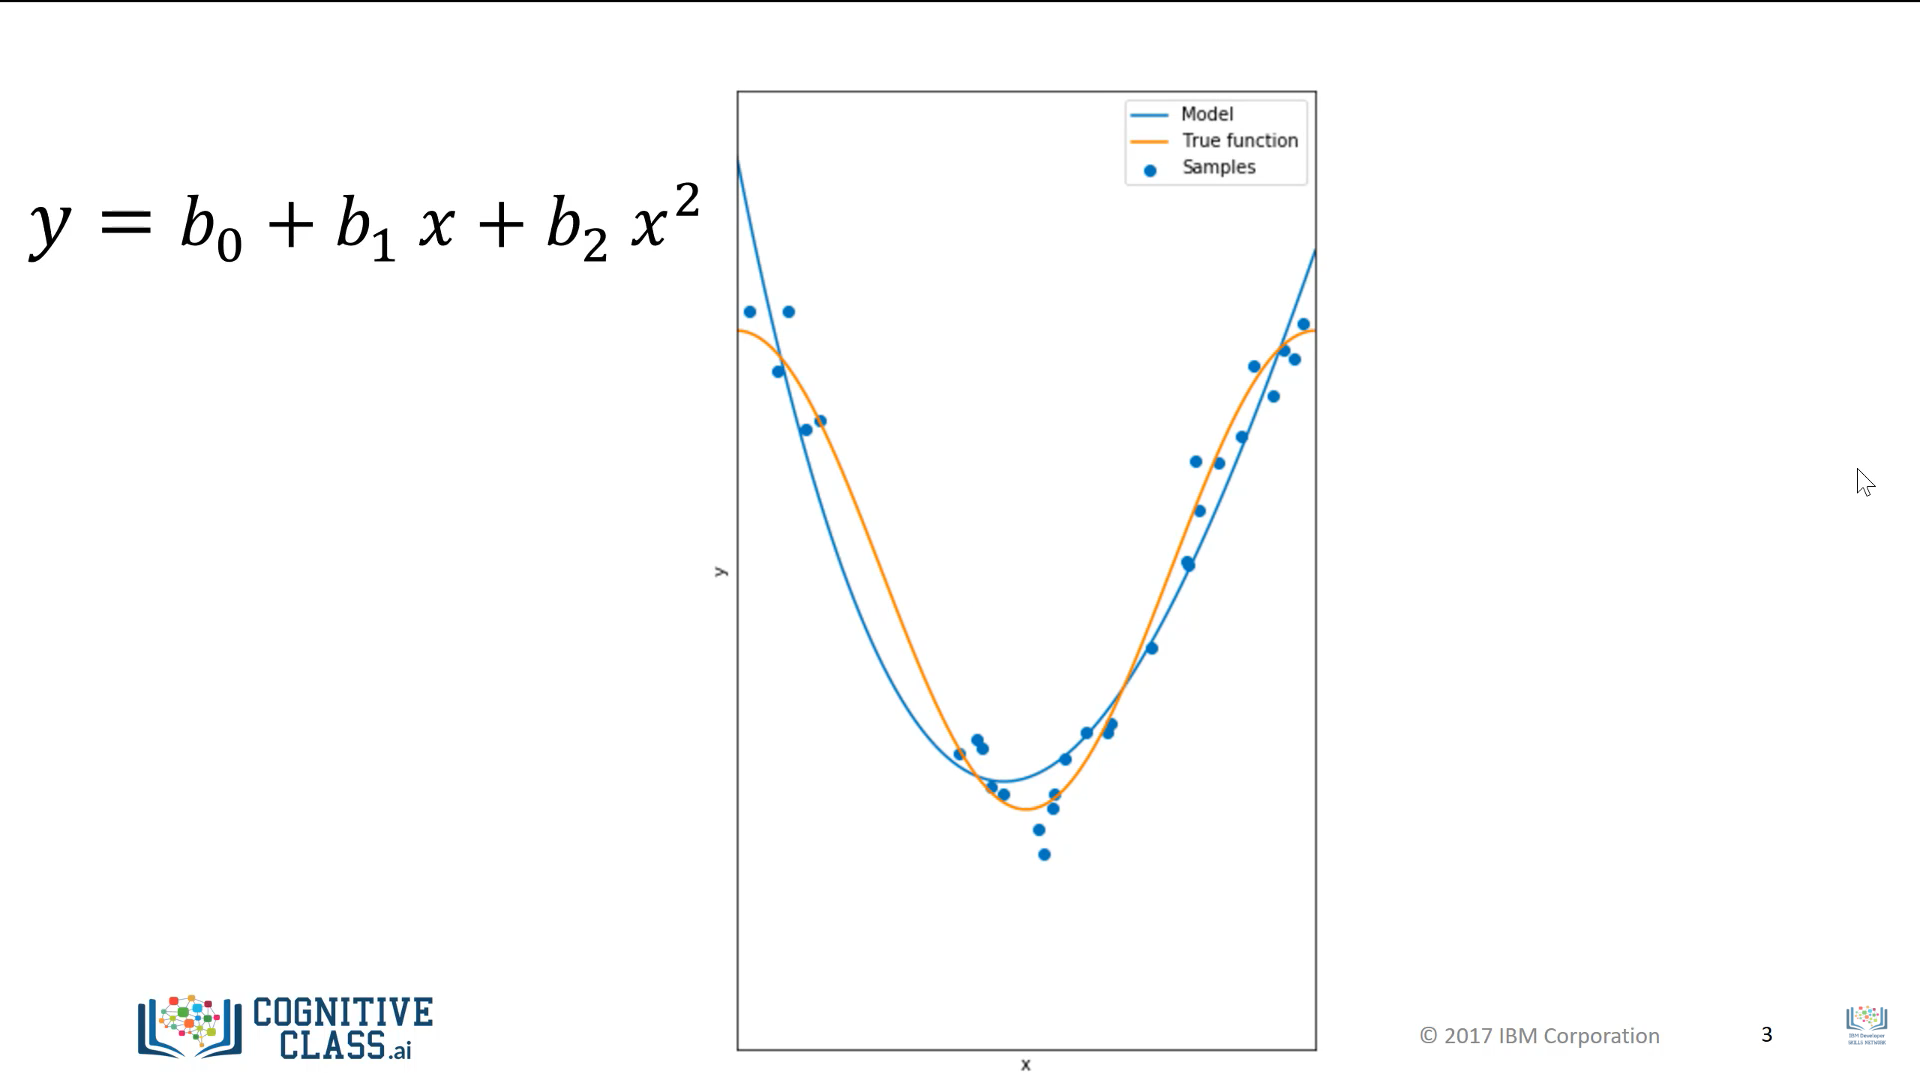

Este es un ejemplo de un polinomio de orden 8 usado para entrenar los datos, vemos que el modelo ajusta bien los datos, incluso los puntos de inflexión

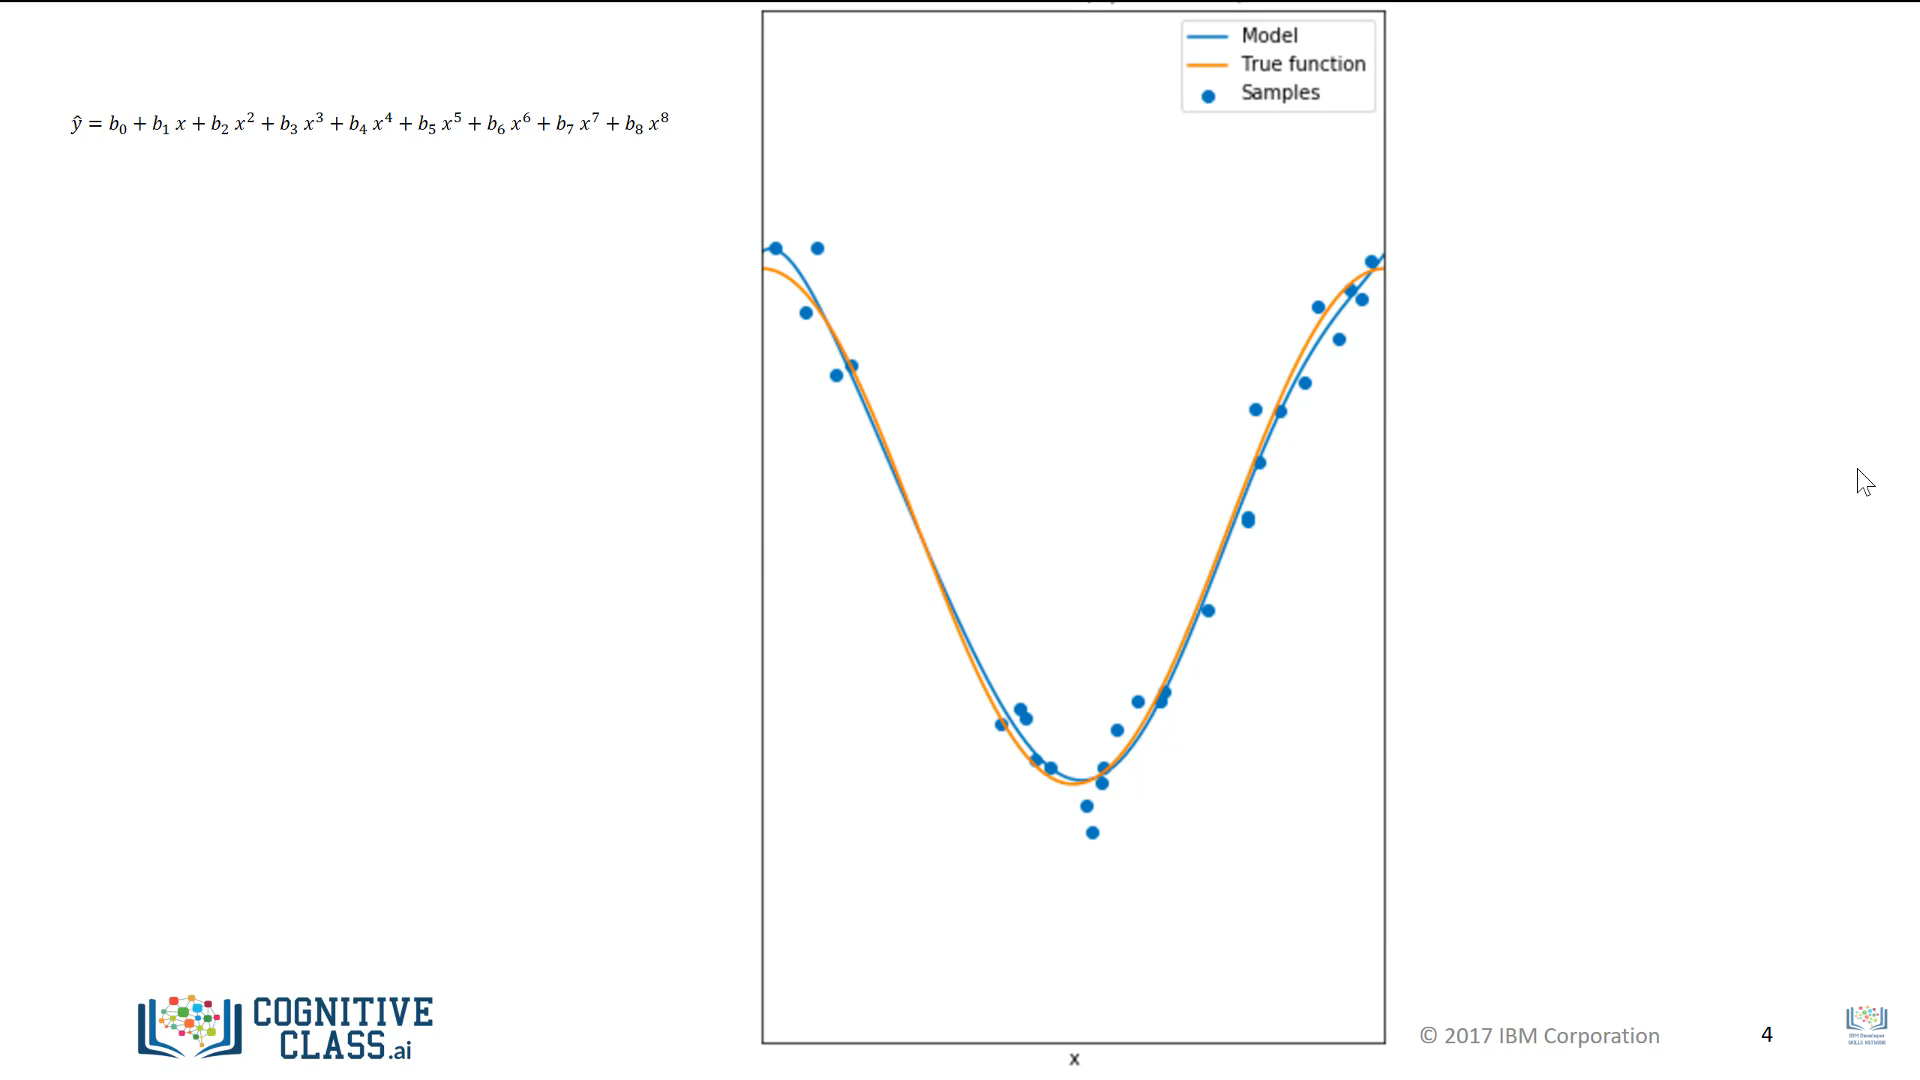

Incrementar la función al orden 16 hace que el modelo se haga muy bueno con los datos de entrada, pero que que se demsepeñe de mala manera para estimar la función (overfitting).

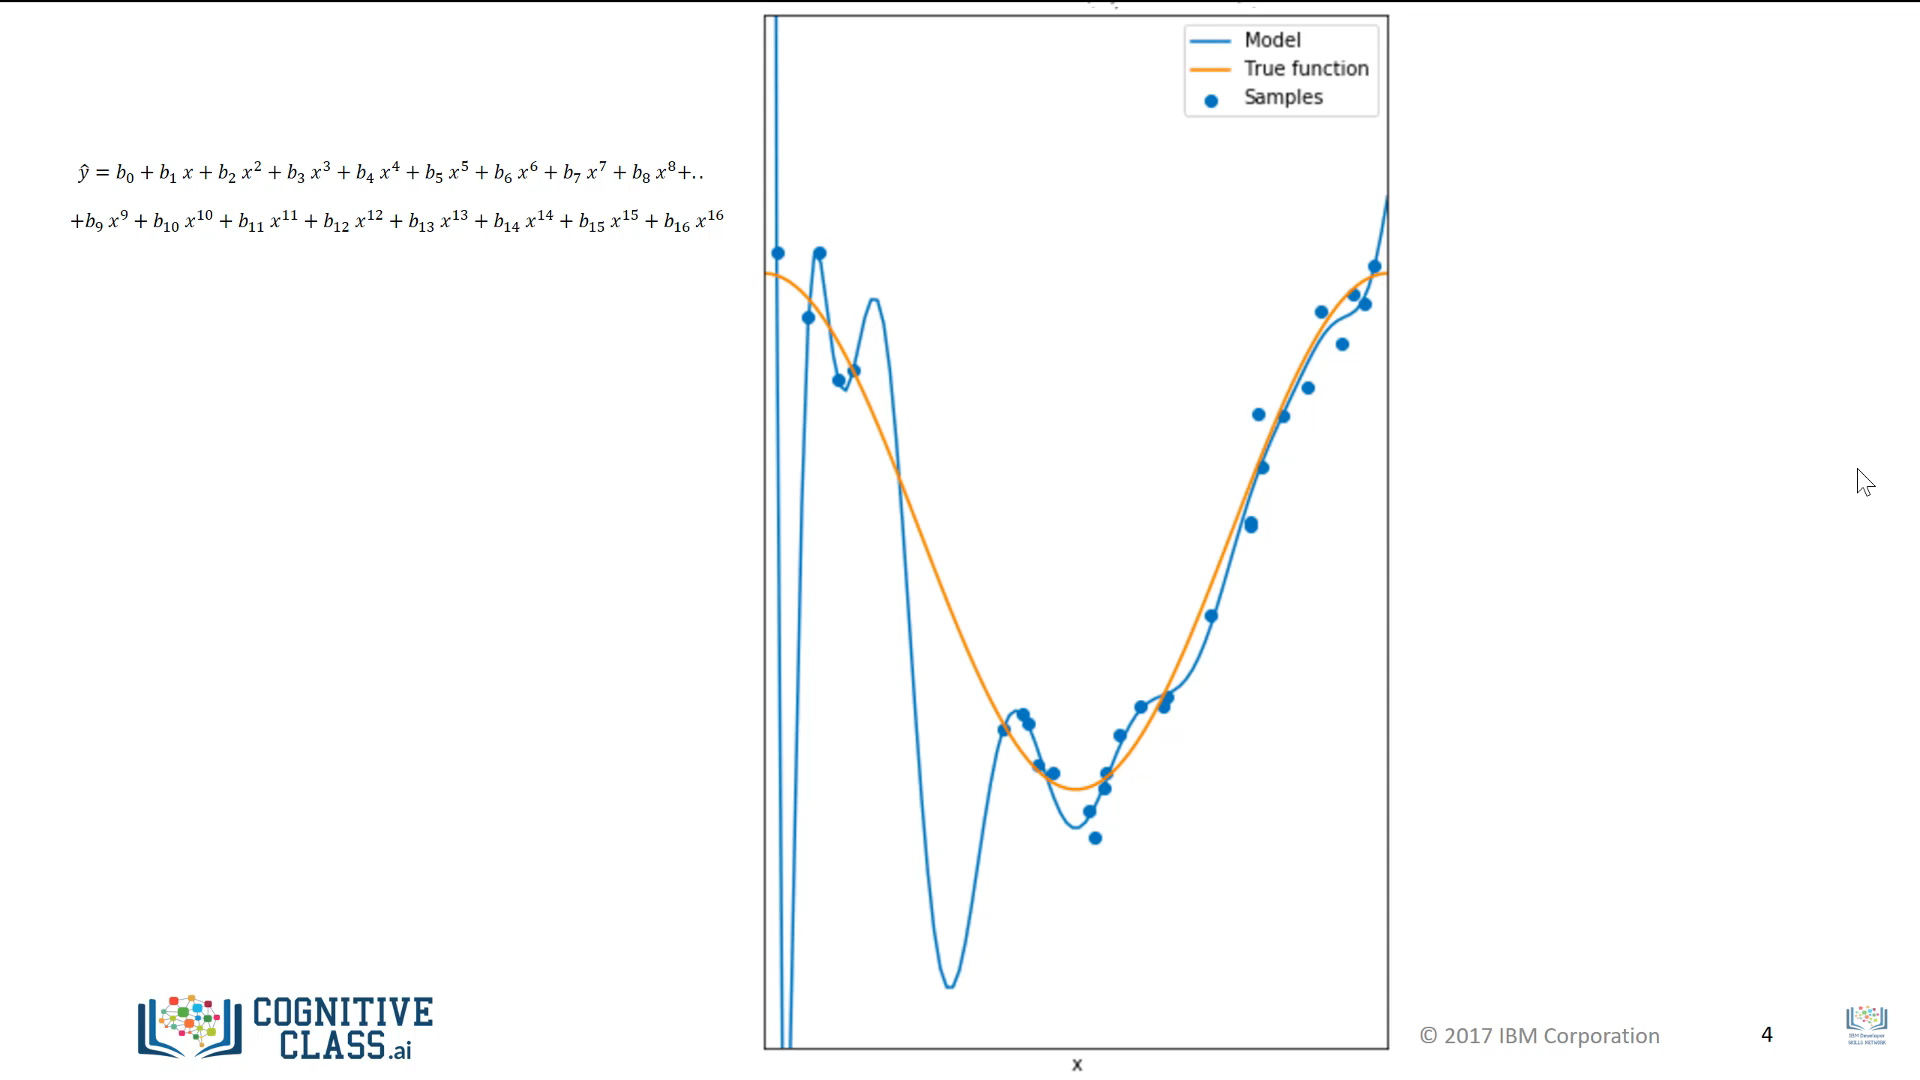

Para determinar el modelo óptimo podemos hacer lo siguiente:

Graficar el error de entrenamiento y el del error

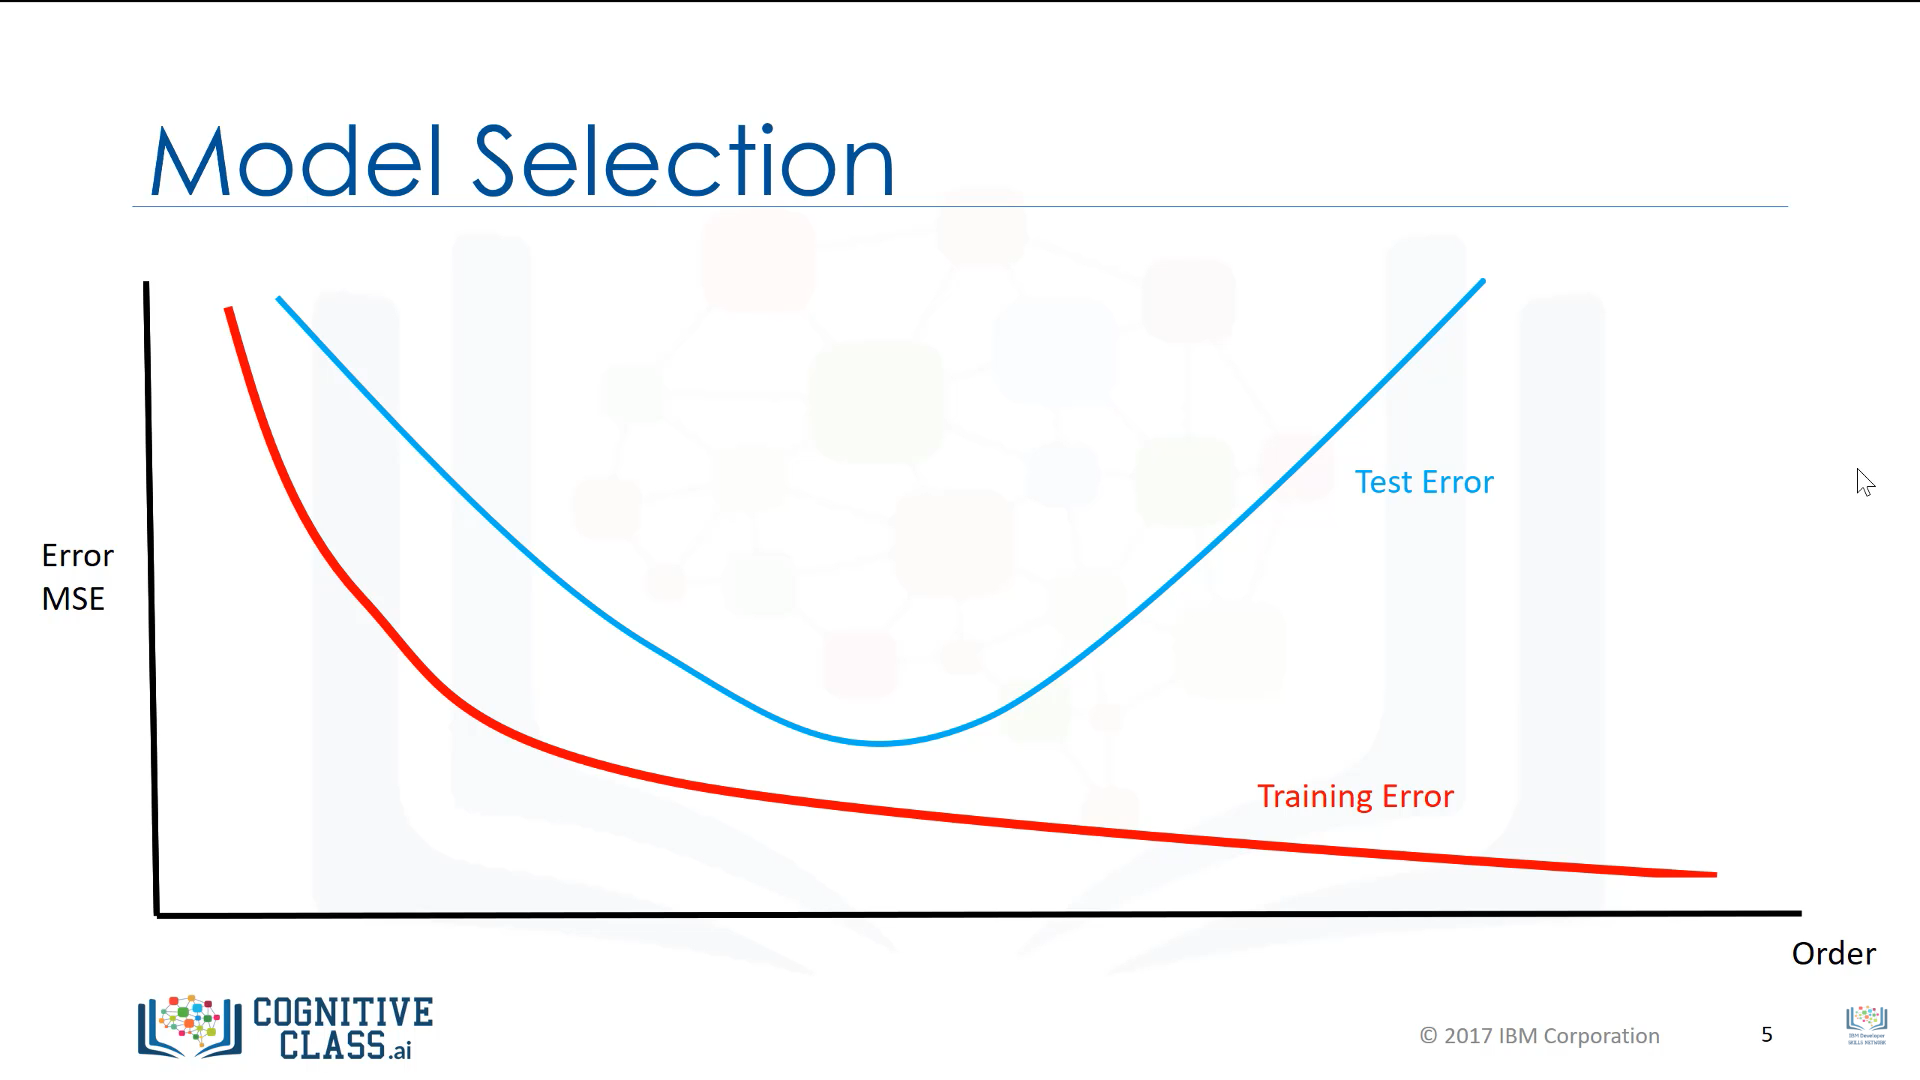

Deberemos basarnos en el punto donde el error sea más bajo en el conjunto de pruebas, en este caso el polinomio 8 es el que da mejor resultados en el conjunto de prueba, todo a la izquierda del 8 será under-fitting y todo a la derecha será over-fitting.

**Importante:** el ruido es aleatorio y no puede ser predecido, a veces se le llama como error irreducible, pero este error no será el único que se tenga, también nuestra función pueda tener errores.

Usando el conjunto de datos de los autos podemos observar que la media no es una buena opción para predecir los valores

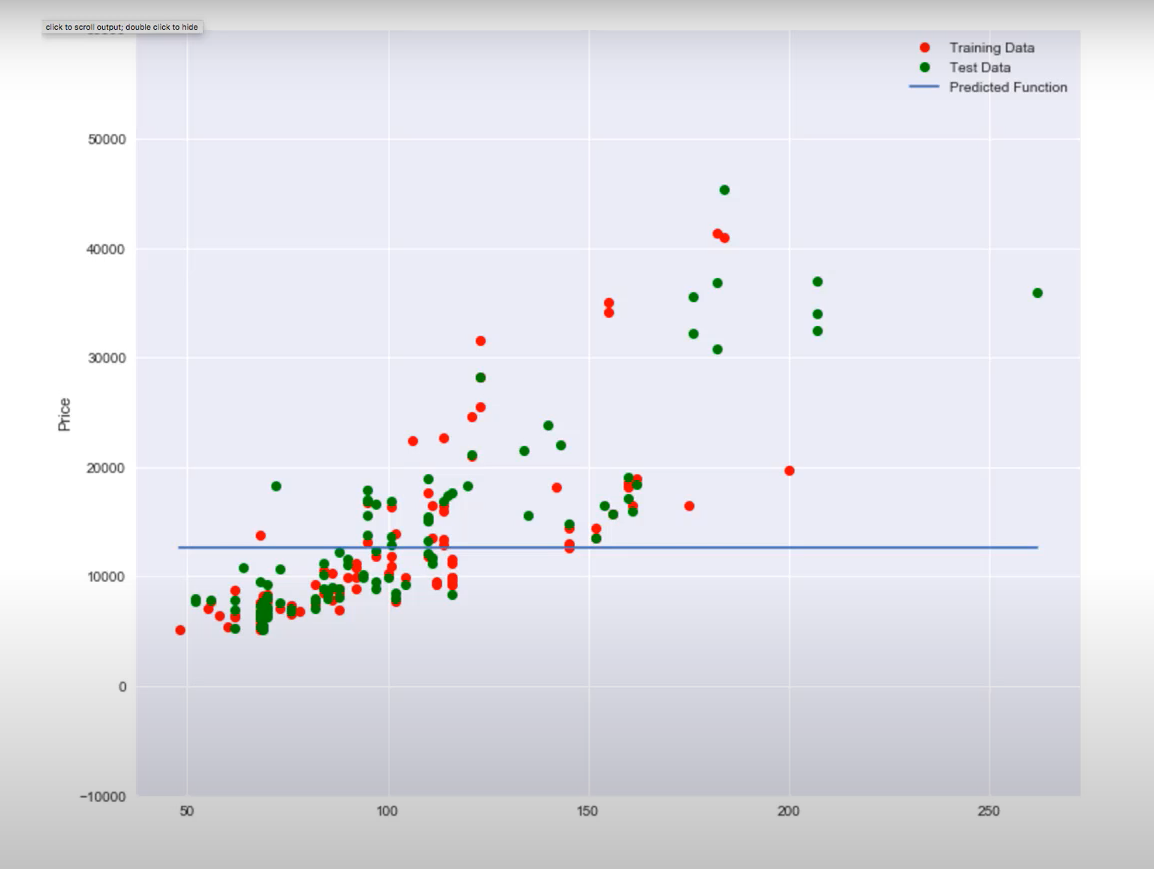

Una función lineal explica mejor los datos

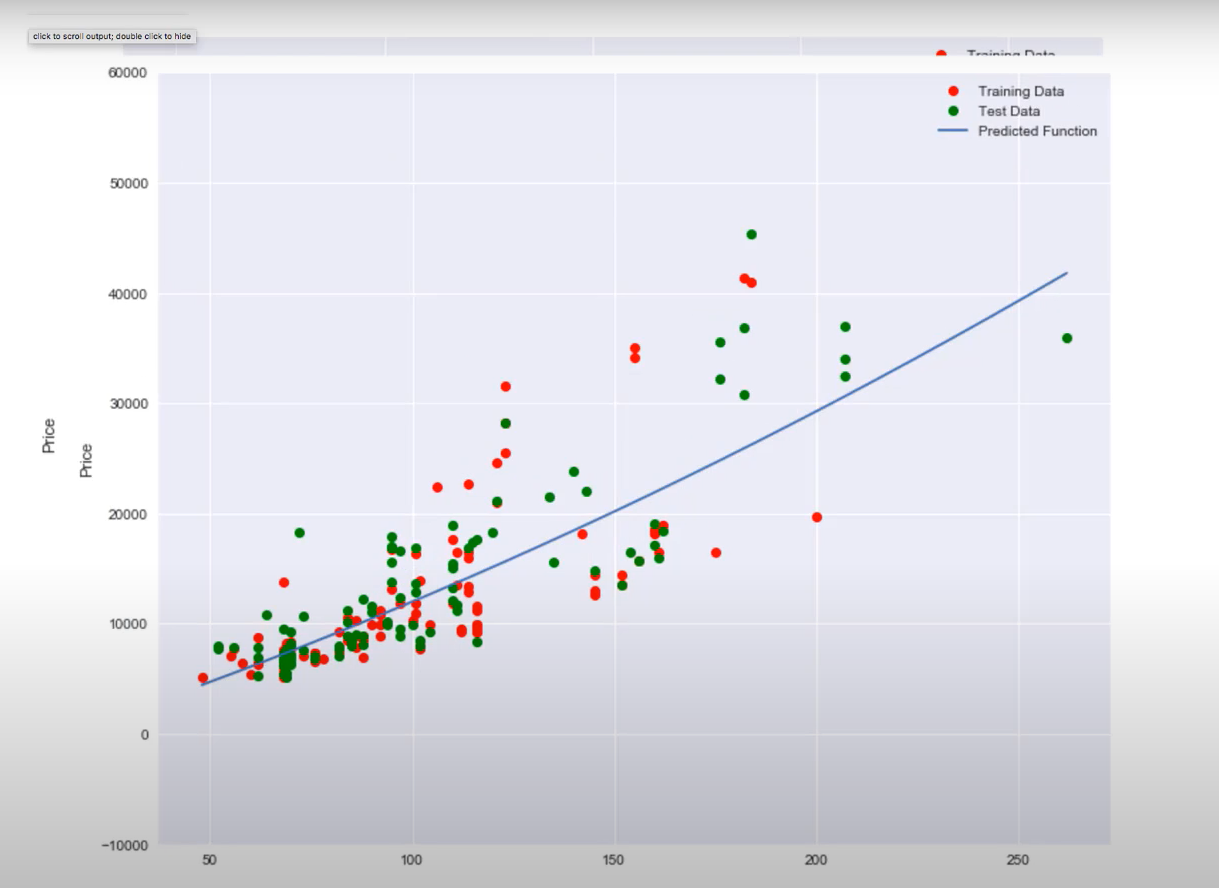

Una función de orden 3 ajusta mejor los datos

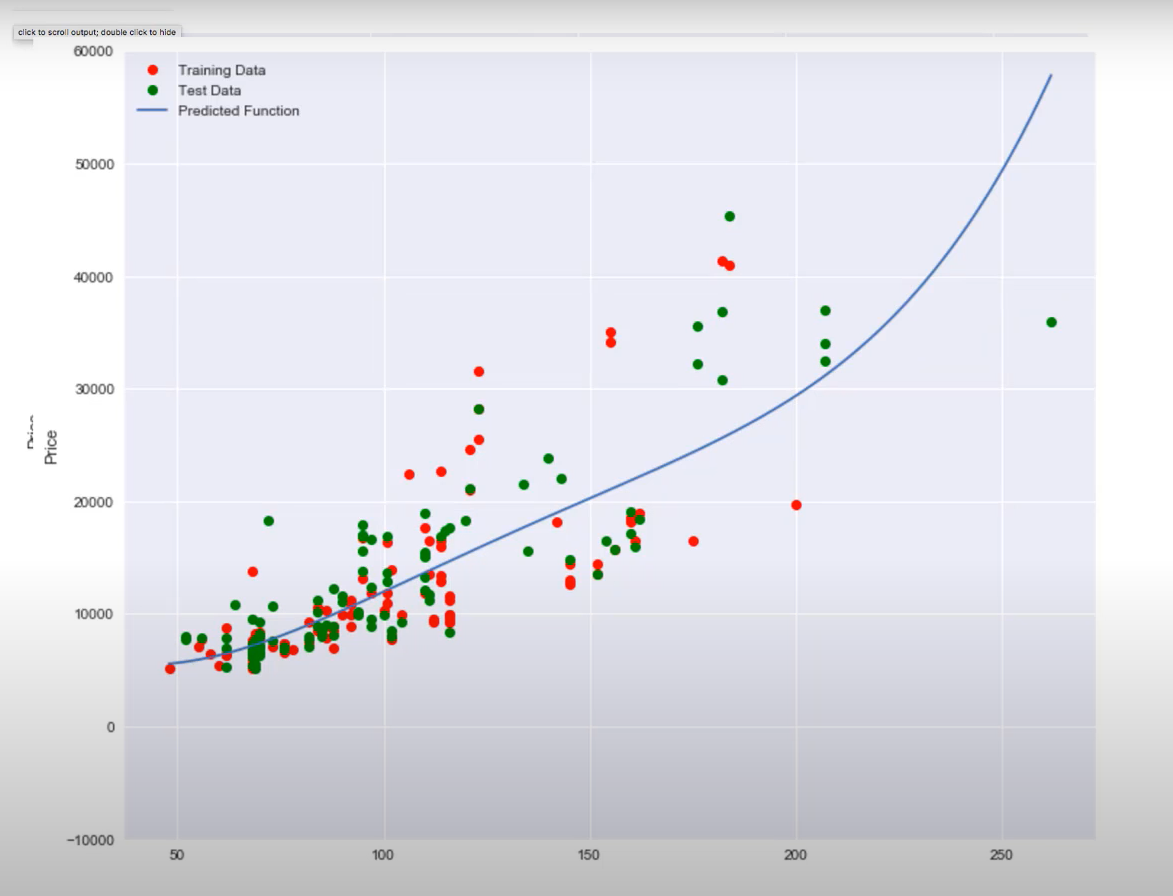

Con la función de orden 4 a partir de 200 caballos de fuerza, el precio decrece1

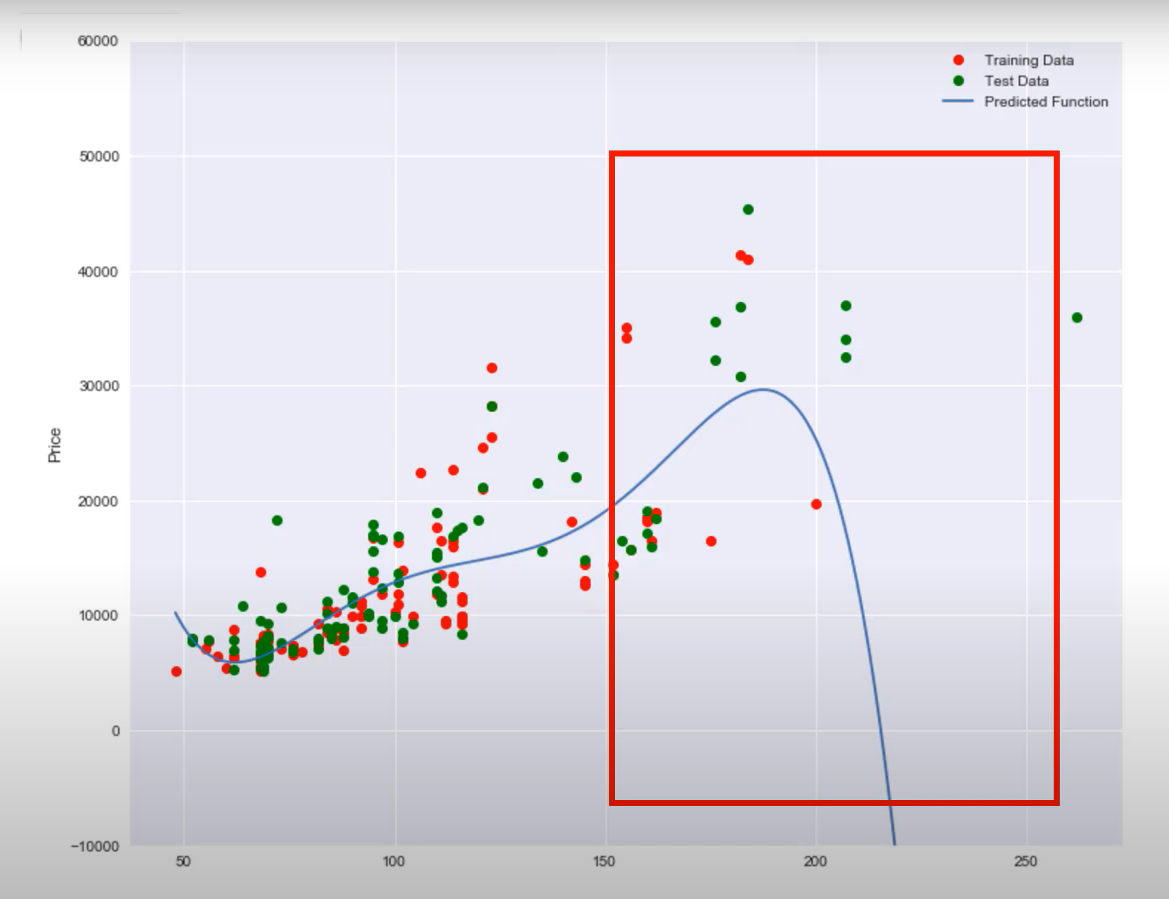

Graficando la ${R_2}$ tenemos que el grado óptimo del polinomio es 3

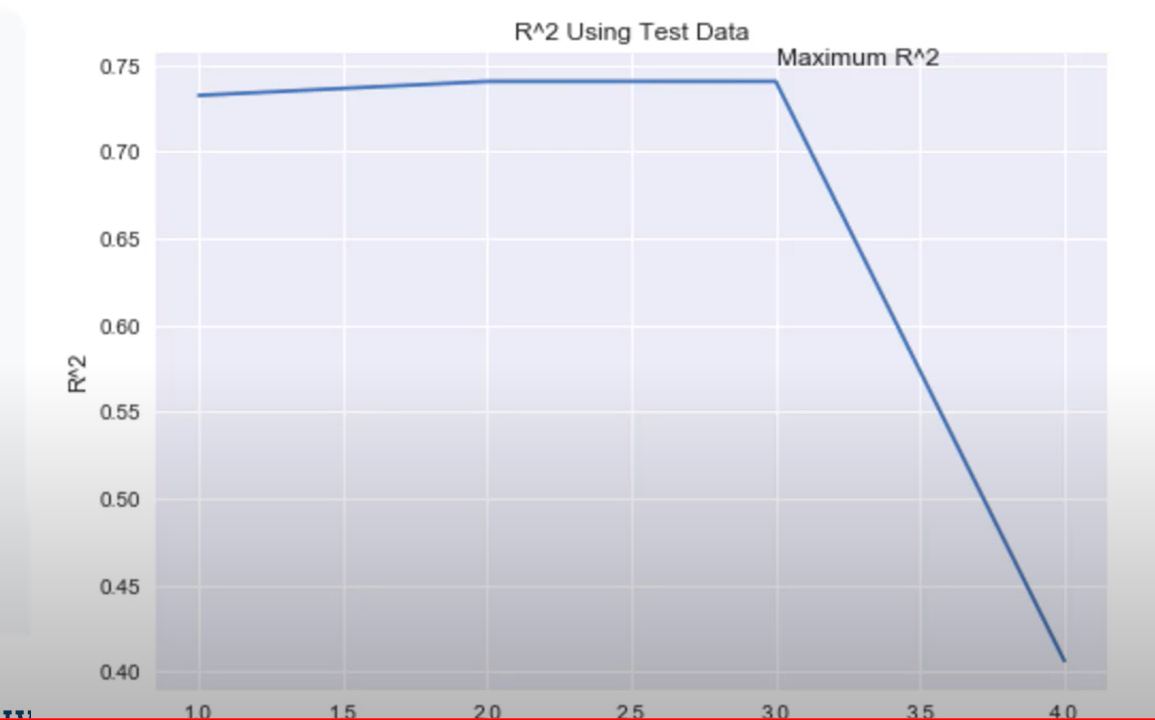

Mientras ${R_2}$ sea más cercano a 1, más preciso será 

Podemos calcular diferentes valores para ${R_2}$ de la siguiente manera:

Cargamos el dataset

In [ ]:
import pandas as pd
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
df=pd.read_csv(url, names = headers)

Llenamos missing values

In [ ]:
df["horsepower"]=df["horsepower"].replace("?",111) #reemplazamos valores faltantes
df["horsepower"]=df["horsepower"].astype("int")
df["peak-rpm"]=df["peak-rpm"].replace("?",5000) #reemplazamos valores faltantes
df["peak-rpm"]=df["peak-rpm"].astype("int")
df.price=df["price"].replace("?",13950) #reemplazamos valores faltantes
df["price"]=df["price"].astype("int")

Seleccionamos la variable predictora y la objetivo

In [ ]:
X=df[["highway-mpg"]] #variable predictora
y=df[["price"]] #variable objetivo

Importamos las librerías para entrenar nuestro modelo

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


Dividimos el conjunto de datos en entrenamiento y prueba

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.33, 
                                                    random_state=42)

Obtenemos los valores de ${R_2}$

In [ ]:
lr=LinearRegression()
Rsqu_test=[] #creamos una lista para guardar los valores
order=[1,2,3,4]

for n in order:
  pr=PolynomialFeatures(degree=n) #el grado del polinomio que queremos
  X_train_pr=pr.fit_transform(X_train) #ajustamos nuestros datos con la función polinomial
  X_test_pr=pr.fit_transform(X_test)
  lr.fit(X_train_pr,y_train) #ajustamos los datos polinomiales con la regresión logística
  Rsqu_test.append(lr.score(X_test_pr,y_test)) #los resultados los ponemos dentro de la lista con el append

Imprimimos los resultados

In [ ]:
Rsqu_test

[0.27635138784701696,
 0.41131527663811474,
 0.5353984823055091,
 0.2394750054724385]

# Regresión RIDGE
Este tipo de regresión se utiliza para prevenir el overfitting, cuando se tienen expresiones de grandes magnitudes como en la función mostrada a continuación:

${\hat{y}=1+2x-3x_2-2x_3-12x_4-40x_5+80x_6+71x_7-141x_8-38x_9+75x_{10}}$



Es conveniente utilizar la regresión **Ridge**, lo que hace está regresión es que controla la magnitud de los coeficientes de la función al introducir el parámetro **alpha.**

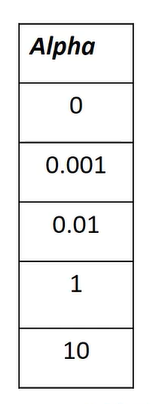

Al usar Ridge los coeficientes quedarán de la siguiente manera:


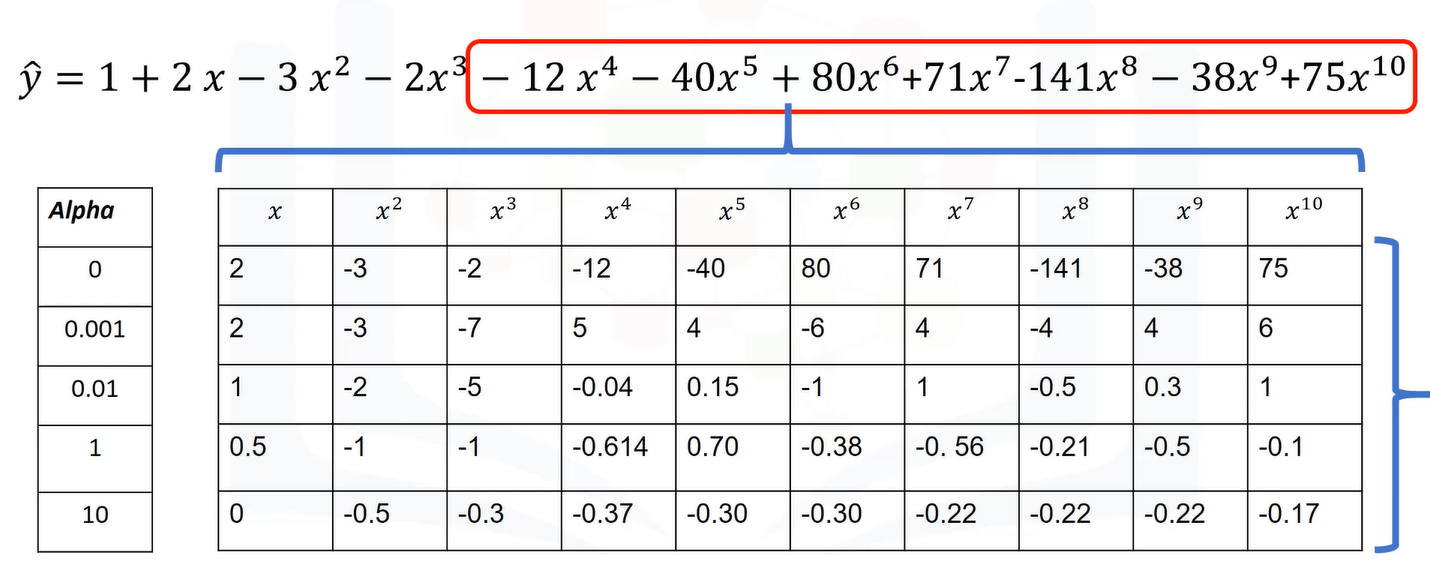

Alpha no debe ser muy grande, o de lo contrario hará que los datos se acerquen a 0 y tengan under-fitting

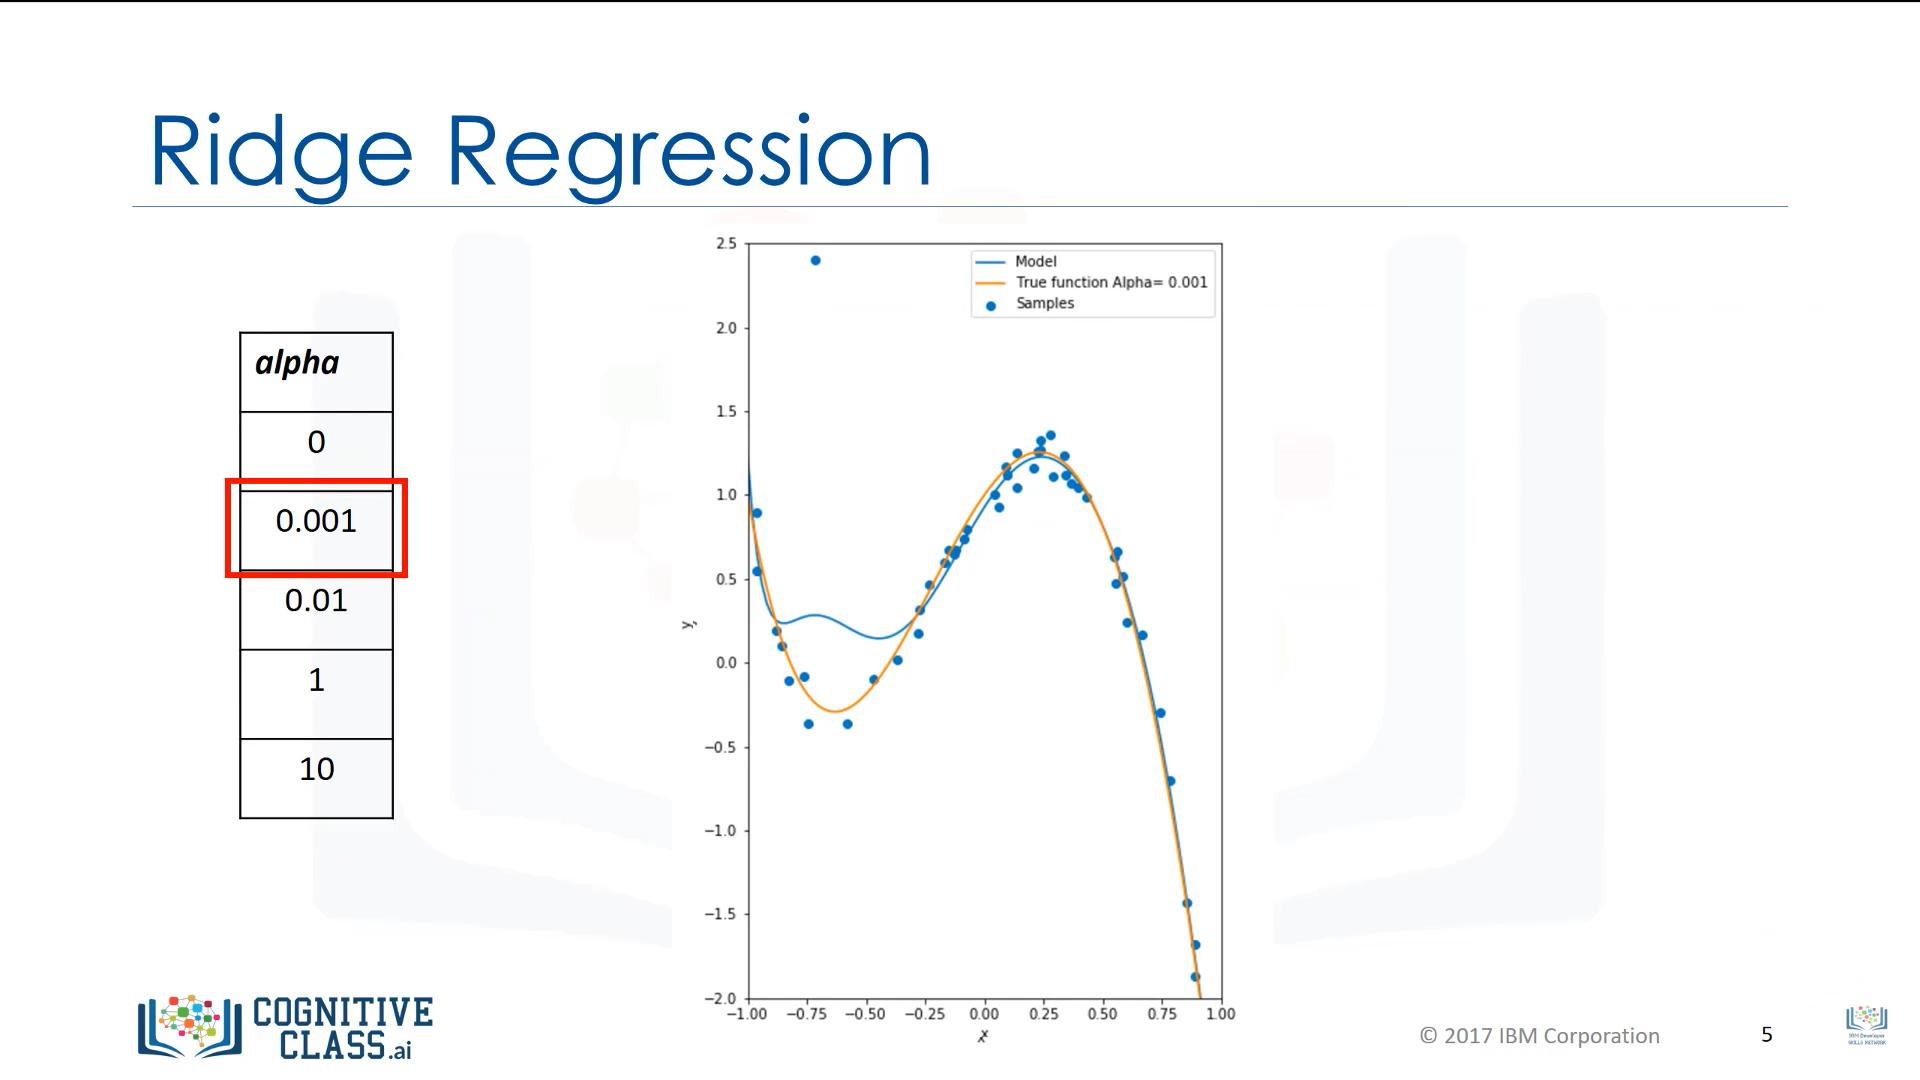

Con alpha 0.001 el over-fitting empieza a desaparecer

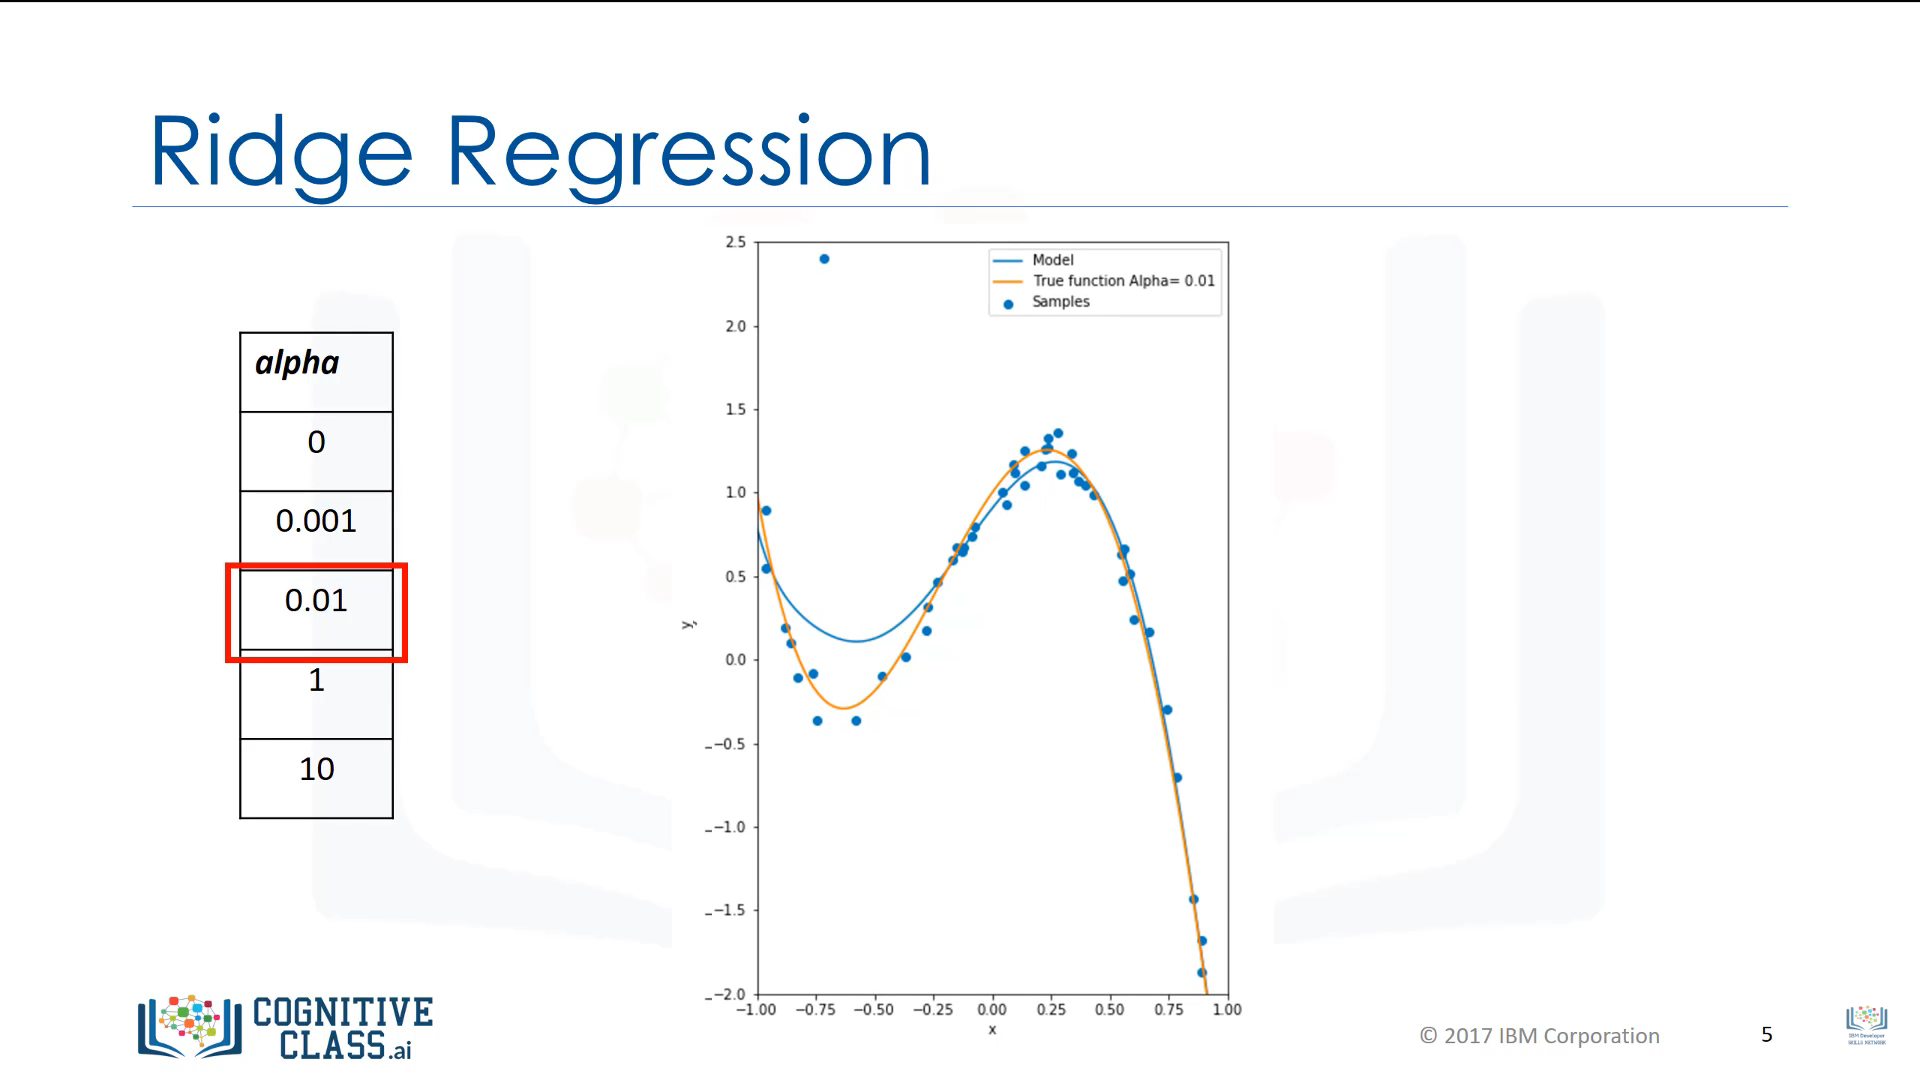

Para alpha 0.01 la función estimada sigue a la función real

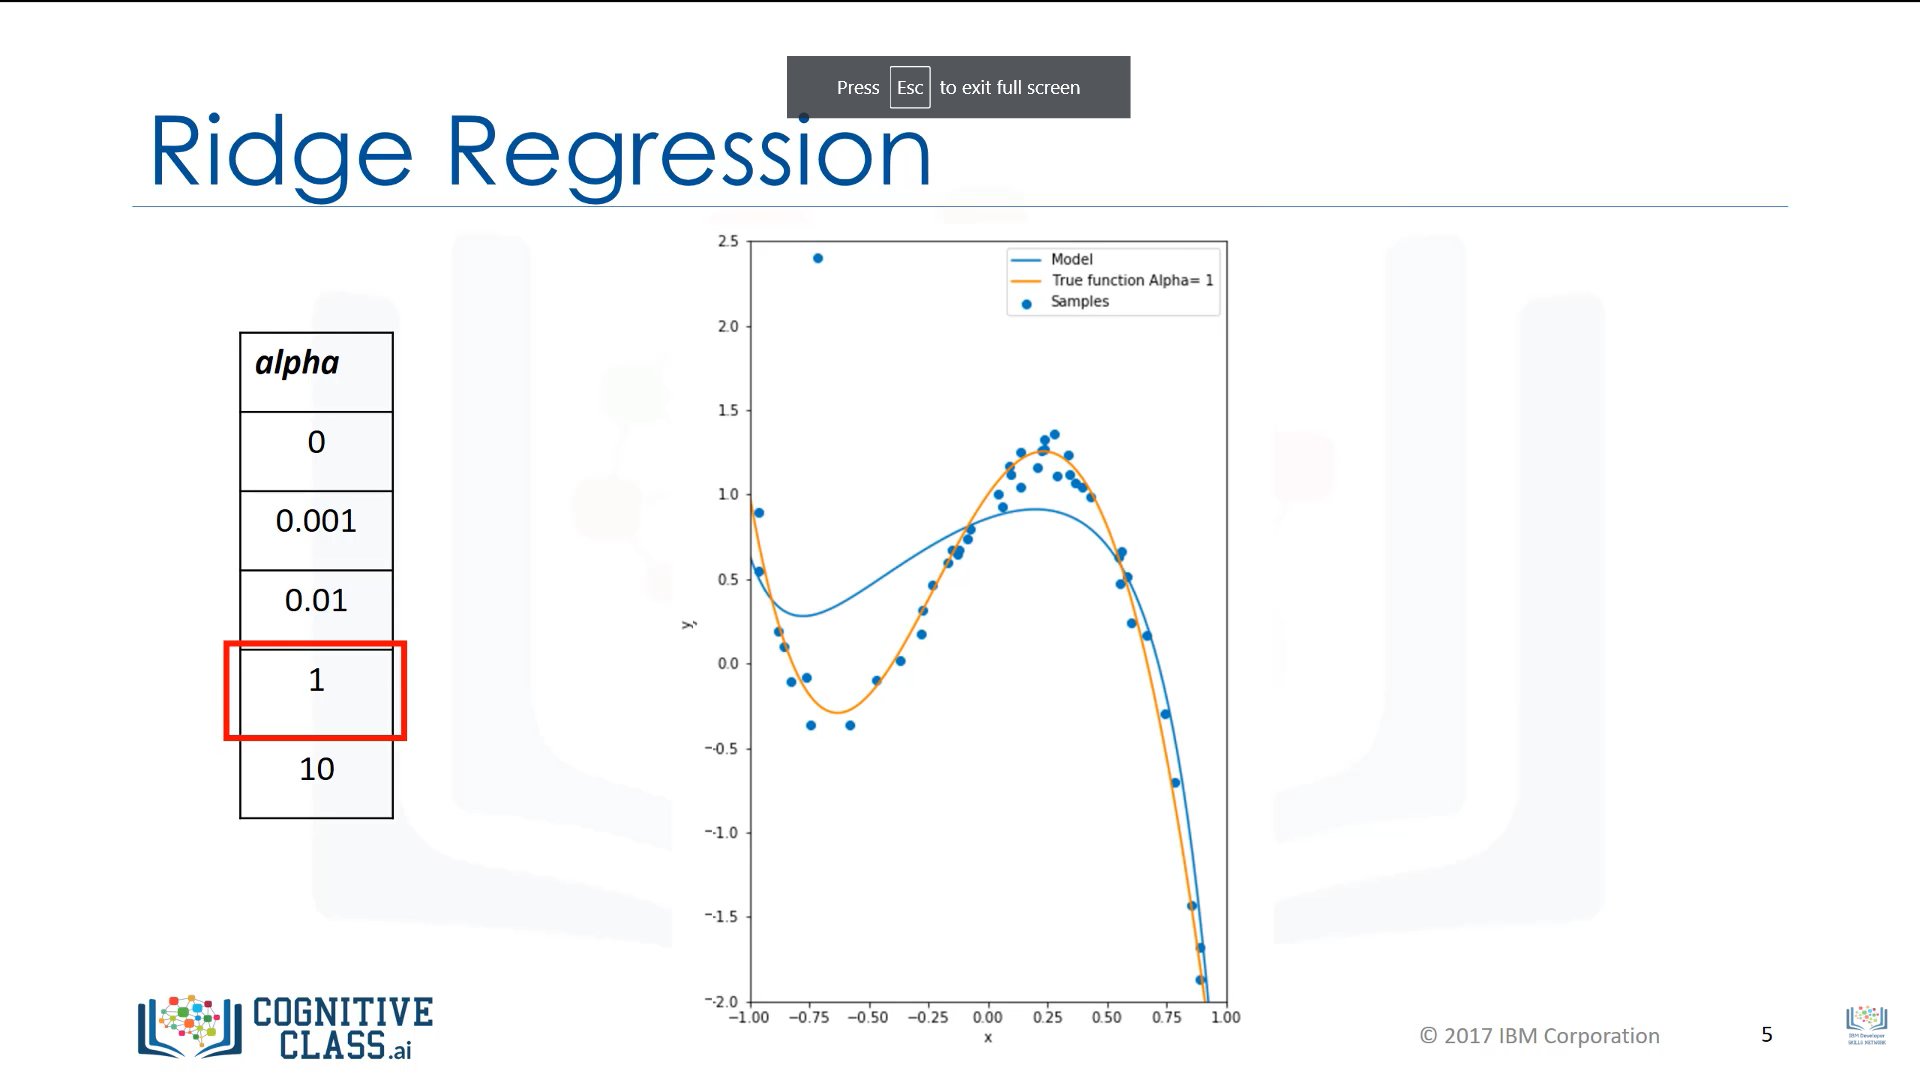

Cuando alpha es igual a 1 se tiene indicios de under-fitting, la función estiada no tiene suficiente flexibilidad. Para seleccionar la alpha correcta usamos validación cruzada. En Python lo que hacemos es lo siguiente:

In [ ]:
from sklearn.linear_model import Ridge #importarmos el módulo de Ridge
RigdeModel=Ridge(alpha=0.1) #usamos alpha de 0.1
RigdeModel.fit(X,y) #ajustamos el modelo
Yhat=RigdeModel.predict(X) #predecimos los resultados

La siguiente imagen muestra el proceso que se debe llevar para comparar valores de alpha, es importante recalcar que la métrica a utilizar puede ser otra.

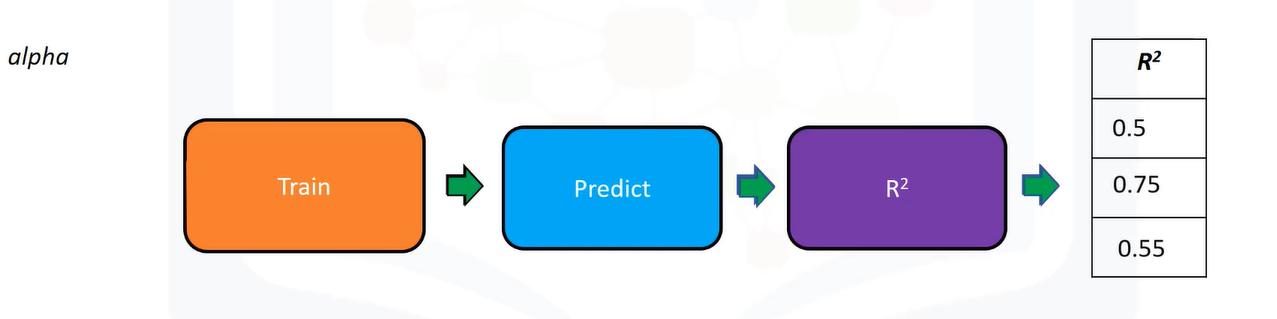

El problema de overfitting es peor si tenemos muchas features.

A medida que alpha crece, nuestra ${R_2}$ decrece, tal como se puede observar en la siguiente gráfica:

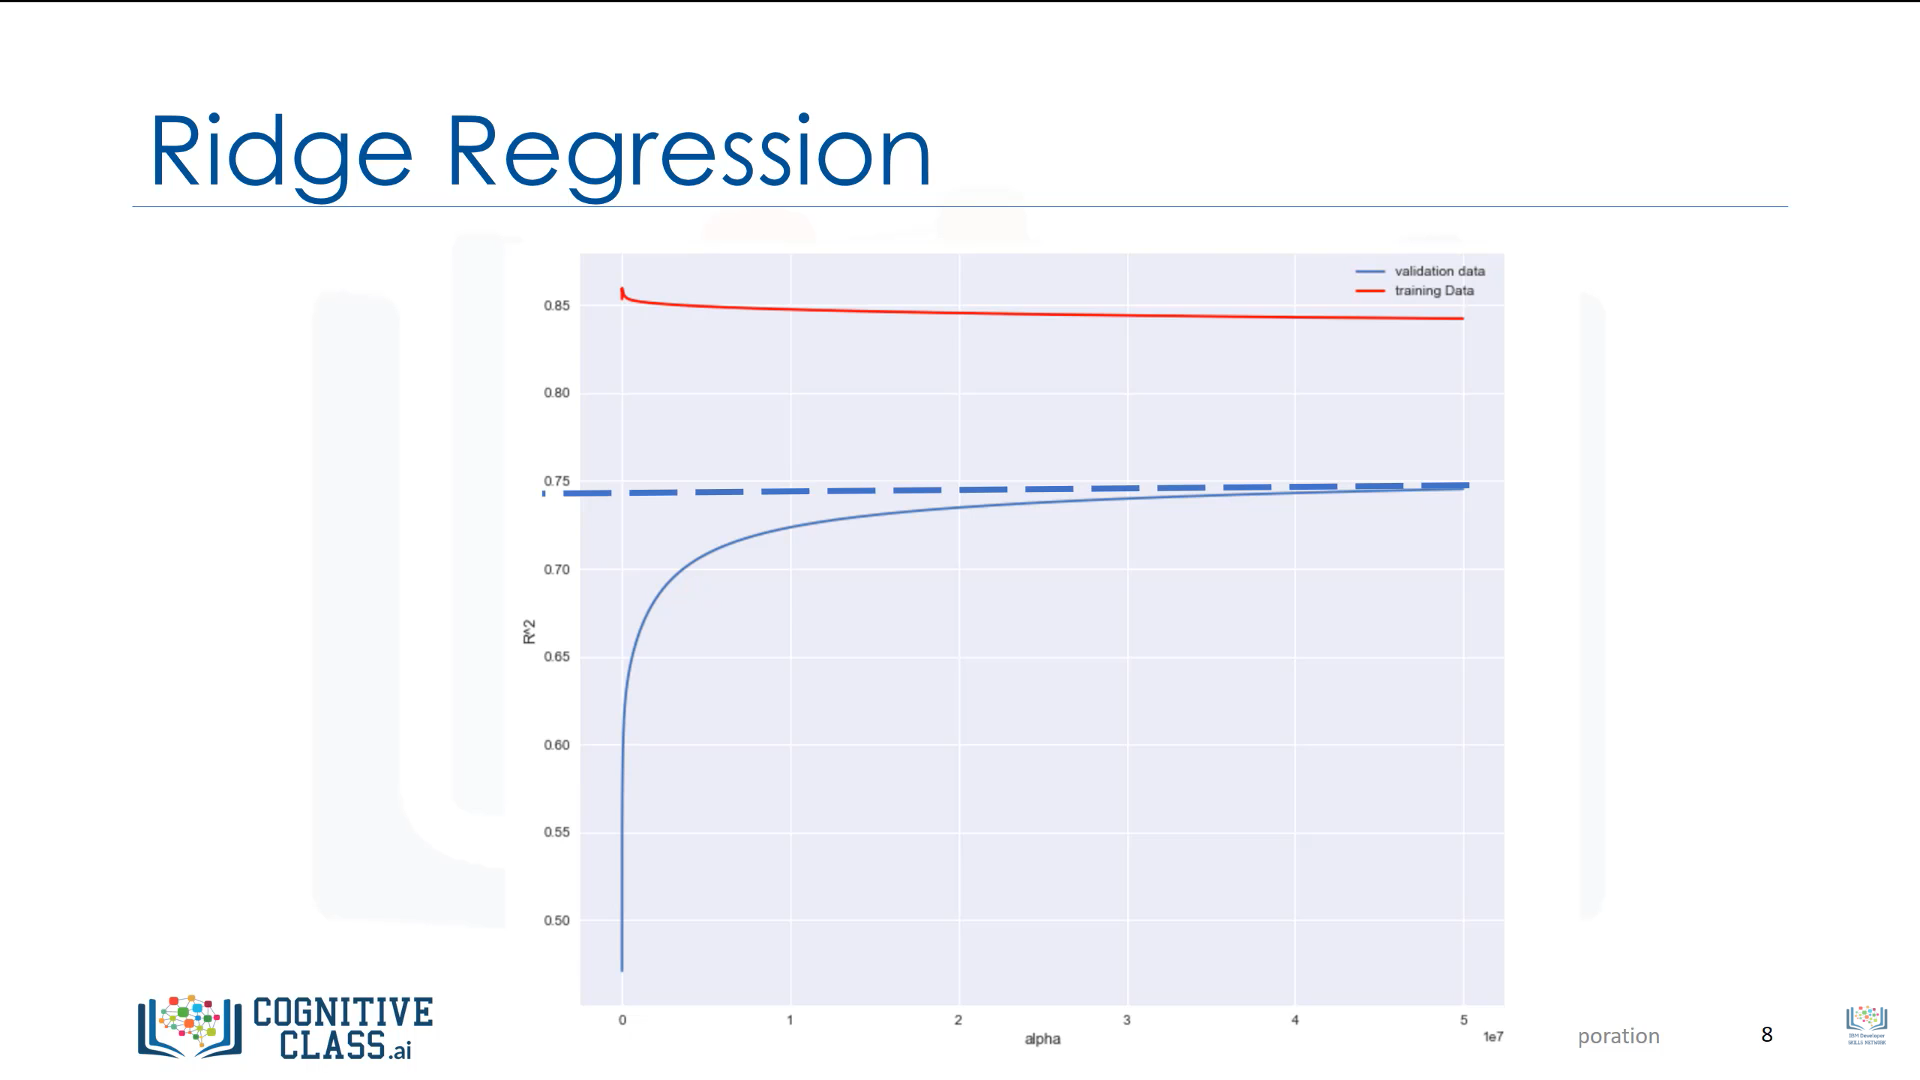

# Grid Search

Nos permite escanear a través de múltiples parámetros con pocas líneas de código.

Parámetros como alpha no son parte del proceso de ajuste y entrenamiento, estos valores se llaman hiperparámetros, la forma de hacerlo en Python es con validación cruzada usando **Grid Search**

Grid search usa el modelo o objetos que queremos entrenar y diferentes valores de los hiperparámetros. Después calcula a r cuadrada o el MSE para varios valores de los hiperparámetros, permitiendo elegir los mejores valores.



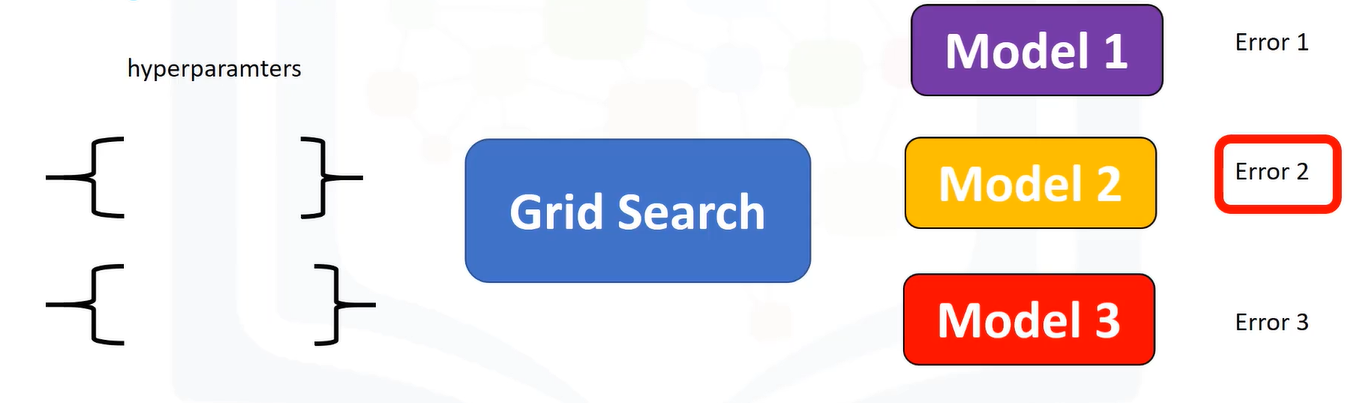

Usamos los hiperparámetros para encontrar el modelo que minimice el error.

Para seleccionar los hiperparámetros dividimos nuestro dataset en 3 conjuntos.

1. Entrenamiento
2. Validación
3. Prueba

Entrenamos el modelo para diferentes hiperparámetros. Seleccionamos los mejores y finalmente probamos el desempeño de nuestro modelo, usando los datos de prueba.

A manera de ejemplo pasamos un diccionario con diferentes valores de alpha

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
parameters={"alpha":[1,10,100,1000]} #la llave es el nombre del parámetro, el value son los diferentes valores de value

Importamos los módulos a utilizar:

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [ ]:
RR=Ridge() #modelo
Grid1=GridSearchCV(RR,parameters,cv=4) #creamos un grid, 4 particiones y el diccionario para los valores de alpha
Grid1.fit(X,y) 
Grid1.best_estimator_ #obtenemos los mejores resultafod
scores=Grid1.cv_results_ #también se puede obtener como la media del score en los datos de validación
scores["mean_test_score"]

array([0.38332331, 0.38360396, 0.38626699, 0.40143581])

Ahora agregamos el parámetro **normlize**

In [ ]:
parameters={"alpha":[1,10,100,1000],"normalize":[True,False]}

El diccionario en este caso tiene 2 valores diferentes

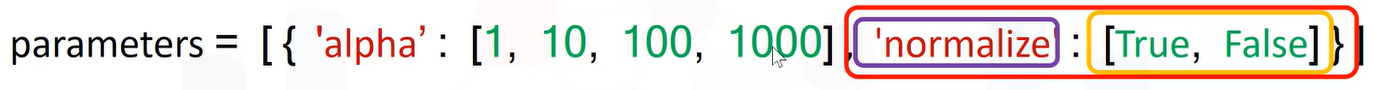

In [ ]:
RR=Ridge() #modelo


Grid1=GridSearchCV(RR,parameters,cv=4) #creamos un grid, 4 particiones y el diccionario para los valores de alpha
Grid1.fit(X,y) 
Grid1.best_estimator_ #obtenemos los mejores resultafod
scores=Grid1.cv_results_ #también se puede obtener como la media del score en los datos de validación
scores["mean_test_score"] #mostramos los resultados

array([ 0.33966524,  0.38332331,  0.0526335 ,  0.38360396, -0.03103578,
        0.38626699, -0.04077111,  0.40143581])

Tenemos 8 resultados dado que son 2 parámetros y 4 particiones

# Graded Review Questions

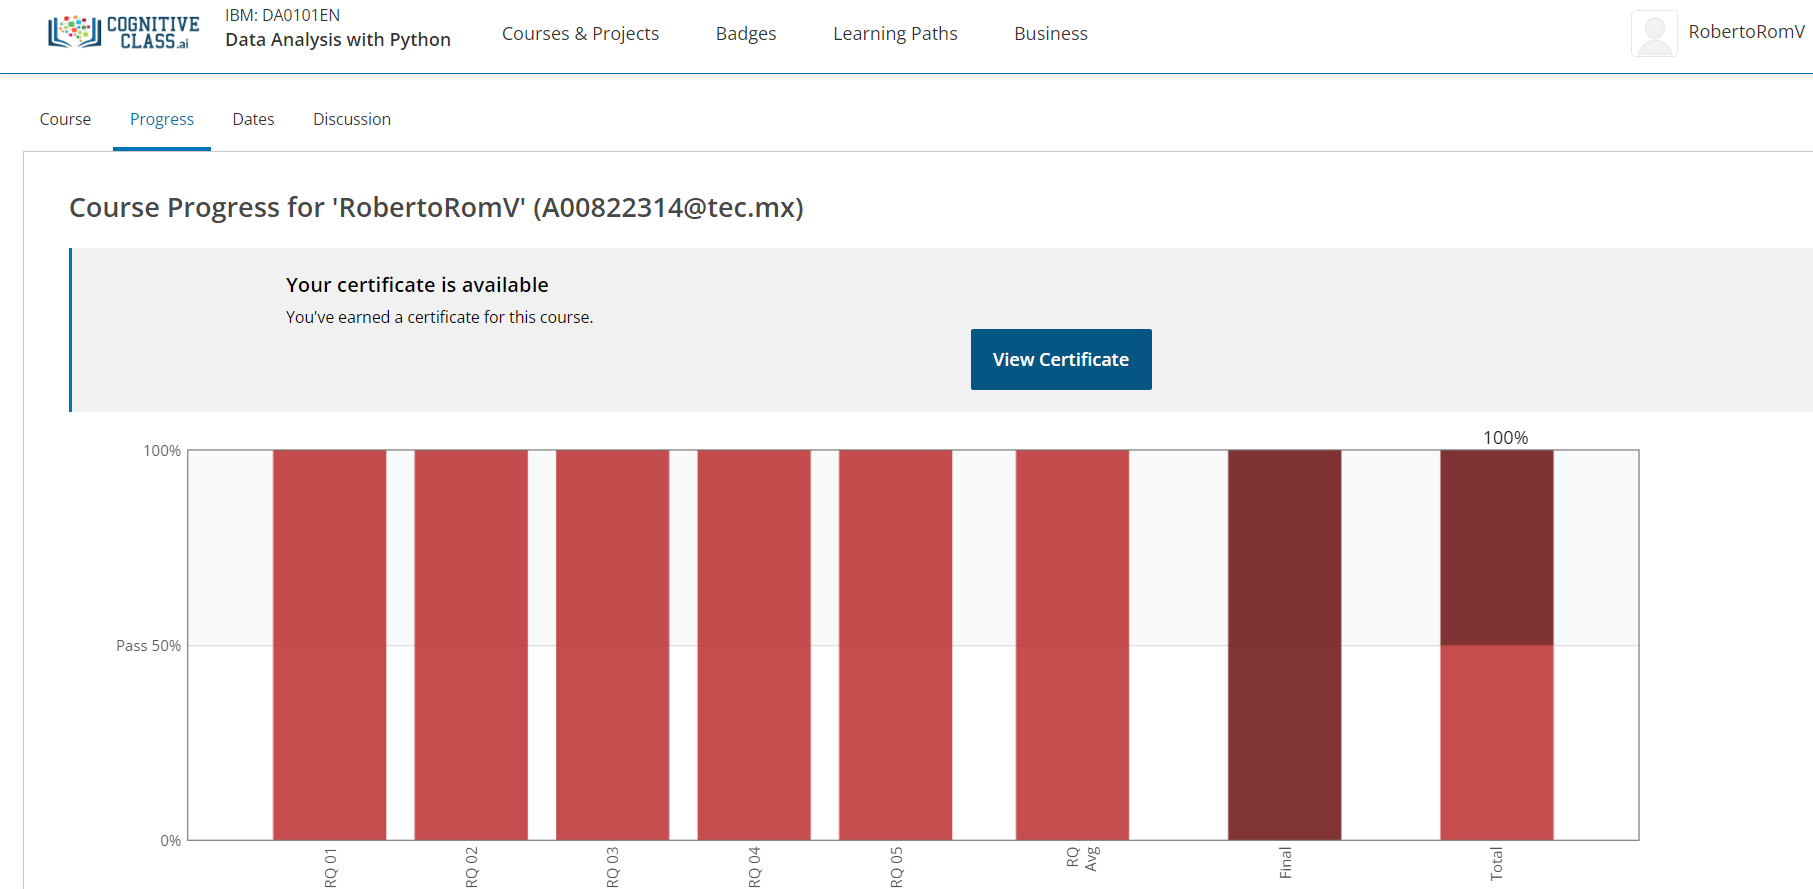

# Evidencias
## ¿Qué es Grid Search?
Grid Search es una técnica de ajuste que intenta calcular los valores óptimos de los hiperparámetros. Es una búsqueda exhaustiva que se realiza sobre los valores específicos de los parámetros de un modelo. El modelo también se conoce como estimador.

## ¿Qué es validación cruzada?
La validación cruzada es un método estadístico utilizado para estimar la habilidad de los modelos de aprendizaje automático.

Se utiliza comúnmente en el aprendizaje automático aplicado para comparar y seleccionar un modelo para un problema de modelado predictivo dado porque es fácil de entender, fácil de implementar y da como resultado estimaciones de habilidad que generalmente tienen un sesgo más bajo que otros métodos.



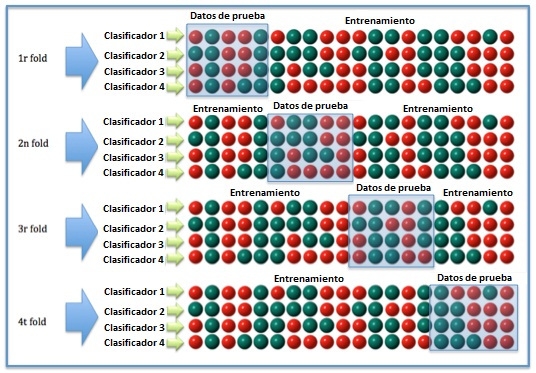

## Overfitting y underfitting
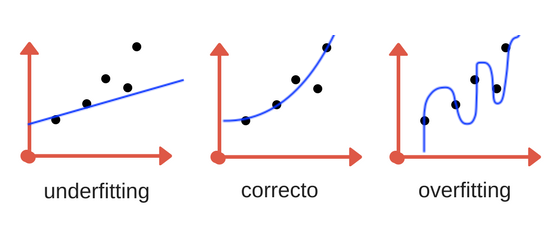

Link a video para entender más del tema: https://www.simplilearn.com/tutorials/machine-learning-tutorial/overfitting-and-underfitting